<a href="https://colab.research.google.com/github/rashmi0852/Airline_Passenger_Refferal_Prediction/blob/main/Airline_Referal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Airline Passenger Refferal Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####  **Name**       - Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rashmi0852/Airline_Passenger_Refferal_Prediction.git


# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [96]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#test statistics
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Load Dataset
airline_df=pd.read_excel("/content/data_airline_reviews.xlsx")

### Dataset First View

In [4]:
# Dataset First 5 rows look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dataset Last 5 rows look
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_df.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 131895
Total columns in dataset= 17


### Dataset Information

In [7]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [8]:
#keep original copy safe
airline_data=airline_df.copy()

In [9]:
# Dataset Duplicate Value Count

duplicate_values=airline_data.duplicated().sum()
print("Duplicate rows in dataset:",duplicate_values)

Duplicate rows in dataset: 70711


In [10]:
#Drop duplicate records
airline_data.drop_duplicates(inplace=True)

In [11]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_data.shape

print("Total rows in dataset=",num_rows)


Total rows in dataset= 61184


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
print(airline_data.isnull().sum())

Missing Values in each column
------------------------------
airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


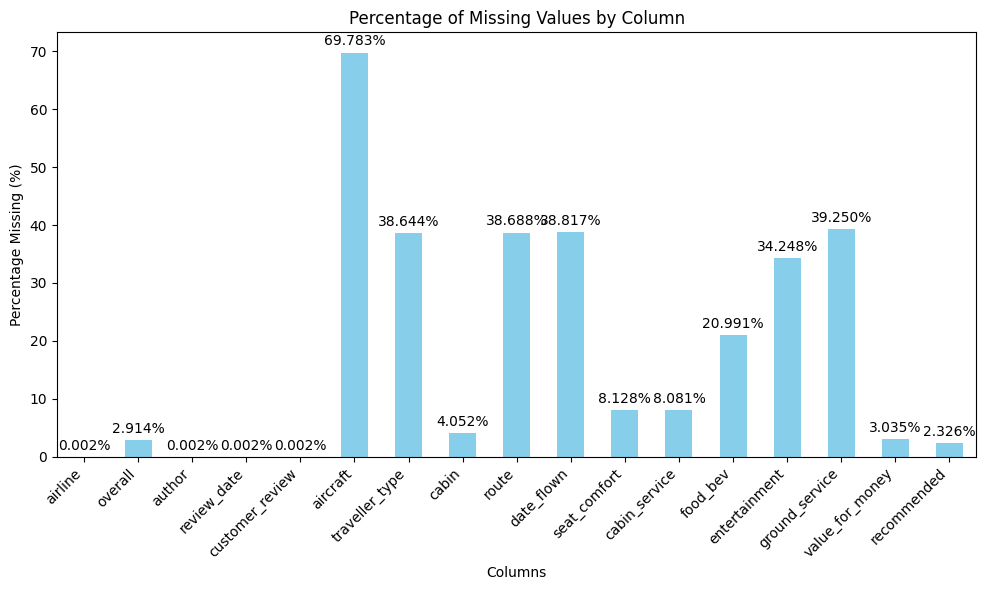

In [13]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (airline_data.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### What did you know about your dataset?

By exploring Airline Review dataset following insights were found:-
* The dataset contains a total of 131,895 records with 17 features.

* There are 70,711 duplicate records present in the dataset.
* Each column contains some missing values (NaN). The Aircraft column contains the highest amount of missing values, with approximately 70% of the data missing. In contrast, the airline, author, review_date, and customer_review columns contain the least amount of missing data (approximately 0.002%), which is nearly equal to zero.

* There are 7 columns with numeric data types (float64), which likely represent ratings or scores for different aspects of the airline experience.

* The remaining 10 columns have the object data type, which can include categorical variables and textual data.

* Out of the object columns, the review_date & date_flown feature originally represents a Date data type but is in the form of a categorical type.

After removing **70711** dulpicates ,records reduced to **61184** & features remains same as **17**.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print(airline_data.columns)


Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')


In [15]:
# # Dataset Describe For Numerical Features
airline_data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
# Dataset Describe For categorical Features
airline_data.describe(exclude="float")

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
count,61183,61183,61183,61183,18488,37540,58705,37513,37434,59761
unique,81,44069,3015,61172,2088,4,4,24549,63,2
top,Spirit Airlines,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,no
freq,2871,93,198,2,2130,13935,45171,31,1127,31268


### Variables Description

* **airline**: Name of the airline.

* **overall**:  Overall rating (1 - 10).

* **author**: Author of the trip

* **review date**: Date of the Review

* **customer review**: Review of the customers in free text format

* **aircraft**: Type of the aircraft

* **traveller type**: Type of traveler (e.g. business, leisure)

* **cabin**: Cabin at the flight(e.g Economy,business)
* **route**: The flight route

* **date flown**: The date the flight was taken

* **seat comfort**: Rating for seat comfort (1-5)

* **cabin service**: Rating for cabin service (1-5)

* **foodbev**: Rating for food and beverage (1-5)

* **entertainment**: Rating for entertainment (1-5)

* **groundservice**: Rating for ground service (1-5)

* **valueformoney**: Rating for value for money (1-5)
* **recommended**:  Whether the customer recommends the airline (categorical, possibly binary).




### Check Unique Values for each variable.

In [17]:
# List of categorical columns
categorical_columns = ['airline', 'author', 'review_date', 'aircraft', 'traveller_type',
                       'cabin', 'route', 'date_flown', 'recommended']
for column in categorical_columns:

  # Select the "airline" column
  airline_column = airline_data[column]

  # Get value counts
  value_counts = airline_column.value_counts()

  # Get the number of unique values
  nunique = airline_column.nunique()

  # Print the results
  print("--"*50)
  print("Column Name:",column)
  print("\nNumber of Unique Values:",nunique)
  print("\nValue Counts:")
  print(value_counts)
  print("--"*50)
  print("\n")


----------------------------------------------------------------------------------------------------
Column Name: airline

Number of Unique Values: 81

Value Counts:
Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: author

Number of Unique Values: 44069

Value Counts:
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
                   ..
A Robbins           1
P Devans            1
T Dayes             1
M Cohn              1
Kasper

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Missing values

In [18]:
#print Missing persentage
print(missing_percent)


airline             0.002
overall             2.914
author              0.002
review_date         0.002
customer_review     0.002
aircraft           69.783
traveller_type     38.644
cabin               4.052
route              38.688
date_flown         38.817
seat_comfort        8.128
cabin_service       8.081
food_bev           20.991
entertainment      34.248
ground_service     39.250
value_for_money     3.035
recommended         2.326
dtype: float64


In [19]:
#Drop missing value records which are less than 5%
airline_data.dropna(subset=["airline","overall","author","review_date","customer_review",
                            "cabin","value_for_money","recommended"],inplace=True)

In [20]:
#Drop aircraft column as 70% if its data are missing
airline_data.drop("aircraft",inplace=True,axis=1)

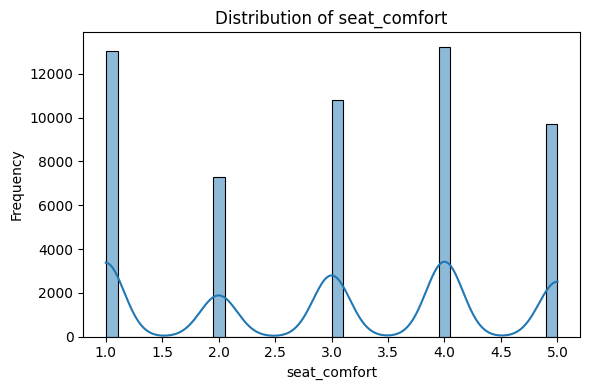

Column: seat_comfort
Median Imputation: 3.00
Mean Imputation: 2.95
Mode Imputation: 1.00


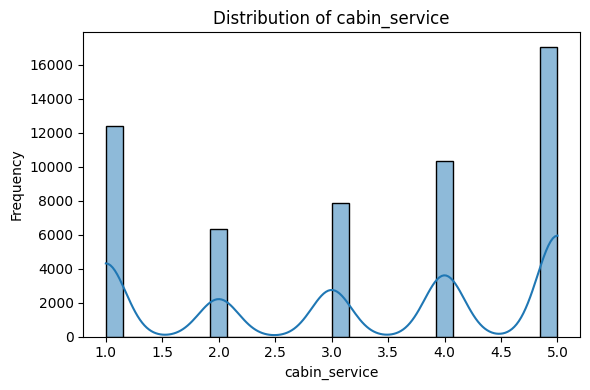

Column: cabin_service
Median Imputation: 3.00
Mean Imputation: 3.19
Mode Imputation: 5.00


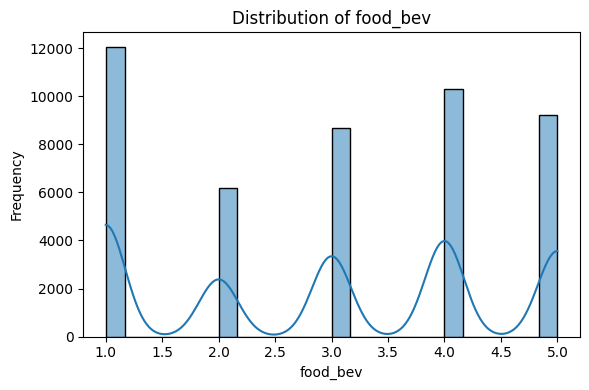

Column: food_bev
Median Imputation: 3.00
Mean Imputation: 2.91
Mode Imputation: 1.00


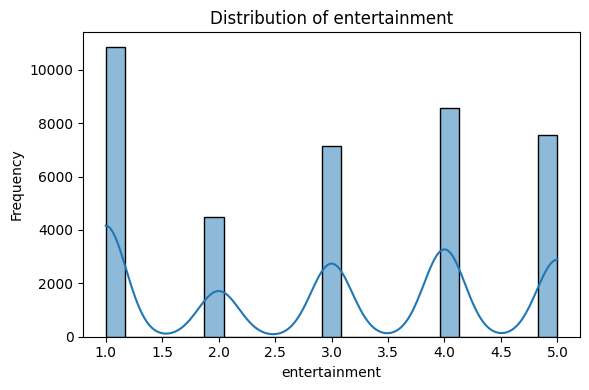

Column: entertainment
Median Imputation: 3.00
Mean Imputation: 2.86
Mode Imputation: 1.00


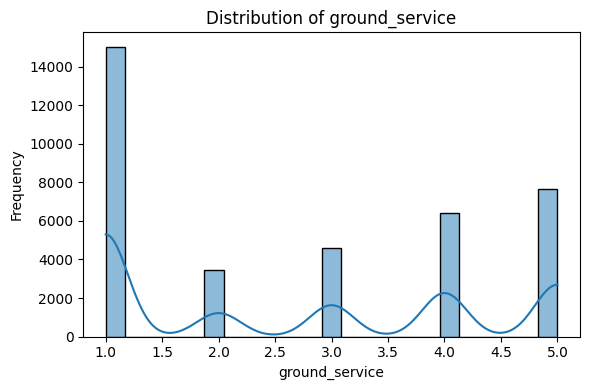

Column: ground_service
Median Imputation: 3.00
Mean Imputation: 2.69
Mode Imputation: 1.00


In [21]:
# List of numerical columns analyze and impute
numeric_missing = ['seat_comfort', 'cabin_service', 'food_bev',
                      'entertainment', 'ground_service']

# Create distribution plots for each column
for column in numeric_missing :
    plt.figure(figsize=(6, 4))
    sns.histplot(data=airline_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Calculate statistics for imputation
    median_value = airline_df[column].median()
    mean_value = airline_df[column].mean()
    mode_value = airline_df[column].mode()[0]

    print(f"Column: {column}")
    print(f"Median Imputation: {median_value:.2f}")
    print(f"Mean Imputation: {mean_value:.2f}")
    print(f"Mode Imputation: {mode_value:.2f}")
    print("="*50)


In [22]:
#Handel numerical missing columns
# Create a SimpleImputer with strategy='median' for numerical columns
numeric_imputer = SimpleImputer(strategy='median')


# Apply the imputer to the numeric columns with missing values
airline_data[numeric_missing] = numeric_imputer.fit_transform(airline_data[numeric_missing])

#convert  numeric missing column value to integer
numeric=['seat_comfort', 'cabin_service', 'food_bev',"overall",'value_for_money',
                      'entertainment', 'ground_service']
airline_data[numeric]=airline_data[numeric].astype("int")



In [23]:
#Handel categorical missing columns
# Create a SimpleImputer with strategy='most_frequent' for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of categorical columns with missing values
categorical_missing = ['traveller_type', 'route', 'date_flown']

# Apply the imputer to the categorical columns with missing values
airline_data[categorical_missing] = categorical_imputer.fit_transform(airline_data[categorical_missing])





In [24]:
airline_data.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

#### Convert to Date datatype

In [25]:
# Convert "review_date" to date data type
airline_data['review_date'] = pd.to_datetime(airline_data['review_date'], errors='coerce')

# Extract month as a numerical value from "review_date"
airline_data['review_month'] = airline_data['review_date'].dt.month



In [26]:
# Convert "date_flown" to date data type
airline_data['date_flown'] = pd.to_datetime(airline_data['date_flown'], errors='coerce')


# Extract month as a numerical value from "date_flown"
airline_data['flown_month'] = airline_data['date_flown'].dt.month



In [27]:
airline_data.shape

(56933, 18)

### What all manipulations have you done and insights you found?

 I addressed the issue of missing values by dropping records where the missing values were less than 5%. For the remaining columns, I utilized a strategy that considered the distribution of the data. Specifically, for numerical columns, I imputed missing values with the median, and for categorical columns, I filled in missing values with the most frequently occurring category. Additionally, due to a high percentage of missing values, I made the decision to drop the 'aircraft' column.

Furthermore, I converted the 'review_date' and 'date_flown' columns from object data type to date data type, enabling me to perform temporal analyses. As a result, I derived four new columns: 'flown_year,' 'flown_month,' 'review_month,' and 'review_year.'

These data preprocessing steps led to a reduction in the number of records from 61,184 to 56,933, while increasing the number of features from 17 to 18."


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis

#### Chart - 1

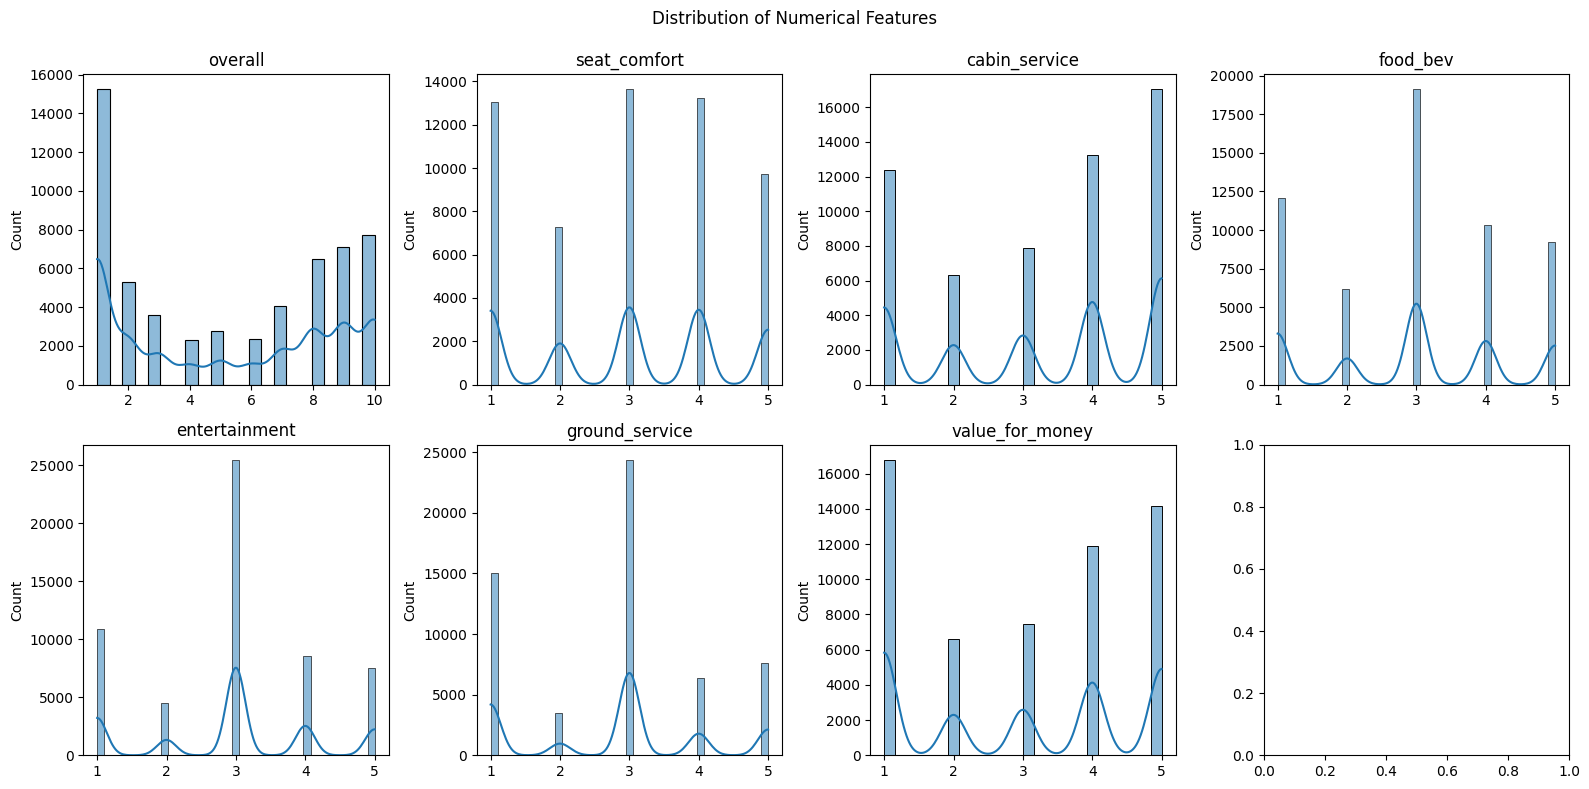

In [28]:
# Chart - 1 visualization code
#Question -1:Find Distribution of numerical features


# List of numerical columns
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution of Numerical Features')

# Plot histograms for numerical features
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 4)
    sns.histplot(data=airline_data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

I chose histograms with kernel density estimates (KDE) for visualizing numerical features because they effectively represent data distributions, making it easy to observe patterns, central tendencies, and spread. Histograms are versatile, commonly used, and allow for side-by-side comparisons when multiple features need visualization.

##### 2. What is/are the insight(s) found from the chart?

Certainly, here's the corrected version of the insights based on the histograms:

1. **Overall:** The overall rating feature shows a higher frequency of ratings around 1, indicating that many customers tend to give low ratings. Additionally, there are peaks at ratings 8, 9, and 10, suggesting that some customers provide very high ratings. This distribution indicates that customers have polarized opinions, with a significant number expressing extreme satisfaction or dissatisfaction.

2. **Seat Comfort:** The distribution for seat comfort ratings appears relatively uniform, with similar frequencies across ratings from 1 to 5. This suggests that customers have diverse opinions when it comes to seat comfort, with no single rating dominating.

3. **Cabin Service:** The cabin service ratings also exhibit a relatively uniform distribution across ratings from 1 to 5, indicating varied opinions about cabin service quality.

4. **Food and Beverage:** For the food and beverage ratings, there is a noticeable peak at rating 3, suggesting that a significant number of customers find the food and beverage quality satisfactory. However, there are also lower frequencies at the extremes, indicating both positive and negative opinions.

5. **Entertainment:** Entertainment ratings have a relatively high frequency at rating 3, similar to seat comfort and cabin service. This suggests that customers have mixed feelings about the entertainment offerings on flights.

6. **Ground Service:** Ground service ratings show a distribution similar to entertainment, with higher frequencies around rating 3. This indicates that customers generally have more neutral opinions about ground service compared to other aspects of the flight.

7. **Value for Money:** The distribution of value for money ratings is relatively high at rating 1 and lower at rating 2, then gradually increases for higher ratings. This suggests that customers have diverse opinions about whether they perceive their flights as a good value for money.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histograms can potentially help in creating a positive business impact, but there are also insights that may raise concerns related to negative growth. Let's analyze both aspects:

**Positive Business Impact:**
1. **Overall Ratings Peaks:** The presence of peaks in overall ratings at 8, 9, and 10 indicates that there is a significant number of highly satisfied customers. This can be leveraged for marketing and promotion as positive customer experiences can be highlighted to attract more customers.

2. **Diverse Opinions:** The relatively uniform distributions for seat comfort, cabin service, and other features suggest that customers have diverse opinions. Understanding these diverse preferences can help airlines tailor their services to meet the varied needs of passengers, potentially improving customer satisfaction.

3. **Value for Money:** The diversity in ratings for "value for money" suggests that some customers perceive flights as a good value, while others do not. Airlines can use this insight to refine their pricing strategies and enhance the perceived value of their offerings.

**Negative Growth:**
1. **Overall Low Ratings:** The higher frequency of low ratings in the overall category (around 1) indicates that a significant number of customers are dissatisfied. This could lead to negative growth if not addressed promptly, as dissatisfied customers may choose competitors or discourage others from using the airline's services.

2. **Mixed Entertainment Ratings:** The mixed feelings about entertainment suggest that improvements may be needed in this area. If not addressed, this could lead to negative growth as entertainment is an important aspect of the passenger experience, and dissatisfaction in this area may impact customer loyalty.

3. **Value for Money Disparity:** The diverse opinions about "value for money" may indicate that some customers do not perceive the airline's pricing as competitive. If this perception is not managed effectively, it could lead to negative growth as customers may seek more cost-effective alternatives.



#### Chart - 2

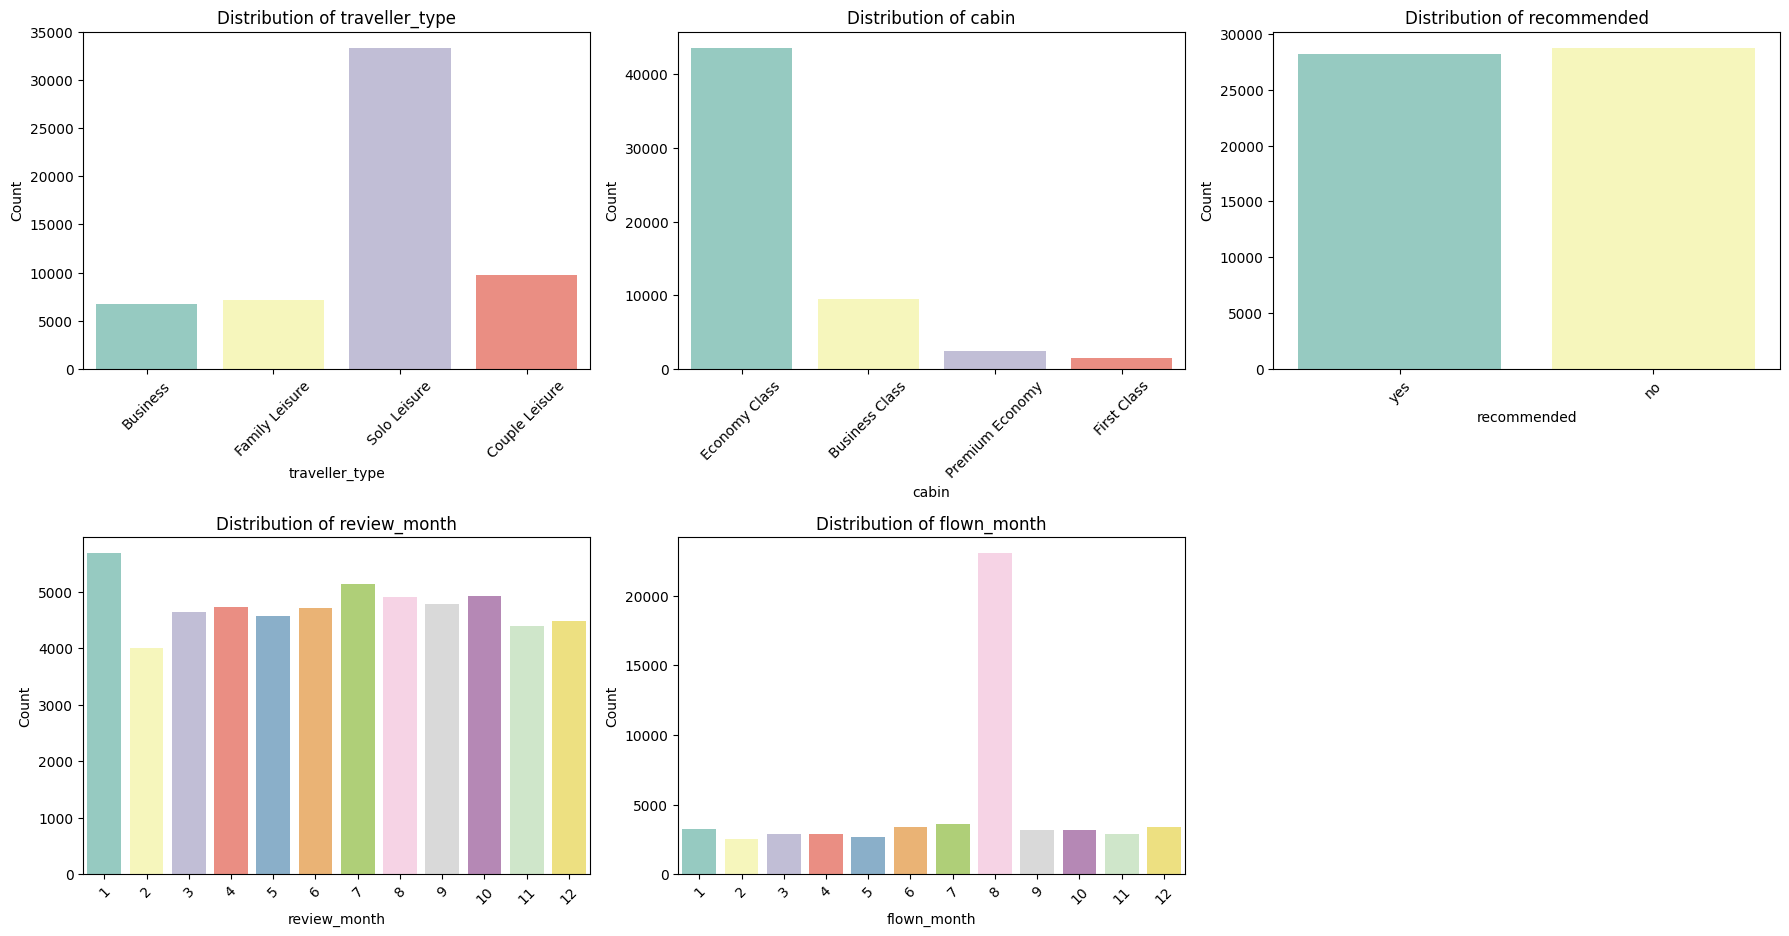

In [29]:
# Chart - 2 visualization code
#Distribution among some Categorical features?

# Categorical columns to visualize
categorical_columns = [ 'traveller_type', 'cabin', 'recommended', 'review_month', 'flown_month']

# Set up subplots
plt.figure(figsize=(18, 14))

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=airline_data, x=column, palette='Set3')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

Count plots (bar plots) were chosen for visualizing the distribution among categorical features due to their effectiveness in representing category frequency, enabling easy comparisons and providing precise count information. The 'Set3' palette was selected to enhance visual appeal, and labels were rotated by 45 degrees for improved readability. These plots offer a clear and concise way to understand the distribution of categorical data and identify patterns and trends within the dataset, making them a suitable choice for this visualization task.

##### 2. What is/are the insight(s) found from the chart?

Insights gained from the count plots of categorical features include:

1. **Traveller Types:** Most reviews are from Solo Leisure travelers, indicating a higher representation of this category.

2. **Cabin Types:** "Economy" is more commonly reviewed, while "First" class reviews are relatively less frequent.

3. **Recommendation:** The "Recommended" feature shows mixed opinions as the values for "Yes" and "No" are similar, indicating a balance between passengers who recommend and those who do not.

4. **Review Months:** Reviews are fairly evenly distributed across different months of the year.

5. **Flight Months:** Flight reviews are relatively consistent, but there is a noticeable increase in August (month 8).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the count plots of categorical features can potentially help create a positive business impact, but there are also insights that may raise concerns related to negative growth.

**Positive Business Impact:**

1. **Diverse Traveller Types:** The high representation of "Solo Leisure" travelers suggests that airlines can cater to this segment with tailored services and marketing efforts, potentially increasing customer satisfaction and loyalty among solo leisure travelers.

2. **Economy Cabin Preference:** The prevalence of reviews for the "Economy" cabin indicates a strong customer base for this class. Airlines can focus on improving and promoting their economy class services to attract and retain customers.

3. **Recommendation Mixed Opinions:** The mixed opinions on recommendations ("Yes" and "No" values) imply that airlines should pay attention to customer feedback and address areas where improvements are needed. By addressing negative feedback, airlines can enhance their overall customer experience and potentially boost positive recommendations.

**Negative Growth:**

1. **Recommendation Mixed Opinions:** While the mixed recommendations provide an opportunity for improvement, they also raise concerns. If negative feedback is not addressed promptly, it may lead to negative growth as dissatisfied customers may choose competitors or discourage others from using the airline's services.

2. **August Flight Peak:** The increase in flight reviews in August suggests higher passenger volume during that month. Airlines should be prepared for peak travel seasons to ensure a smooth experience for passengers. Failure to manage peak demand could result in negative growth if service quality deteriorates during busy periods.



#### Chart - 3

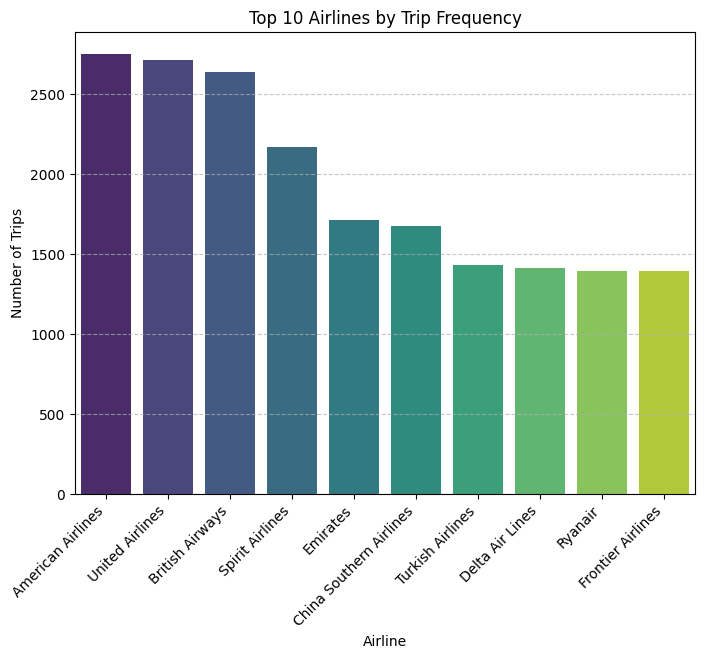

In [30]:
# Chart - 3 visualization code
#Question-3 : Which are the top 10 airlines in terms of the number of trips recorded?


# Calculate the number of trips for each airline
top_airlines = airline_data['airline'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 airlines by trip frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="viridis")
plt.title('Top 10 Airlines by Trip Frequency')
plt.xlabel('Airline')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

The bar plot was selected to visualize the top 10 airlines based on the number of recorded trips. It offers an effective means of comparing trip frequencies among airlines, displaying them in descending order for clear identification of the top performers. The "viridis" palette enhances visual distinction, while rotated labels aid readability. This choice allows for a concise and straightforward representation of the airlines with the highest trip frequencies, catering to easy interpretation and analysis of the data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the bar plot of the top 10 airlines by the number of recorded trips are as follows:

 American Airlines has the highest number of recorded trips among all airlines, indicating its significant presence in the dataset.United Airlines and British Airlines are the second and third highest in terms of trip frequency, demonstrating their substantial representation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from identifying the top airlines by the number of recorded trips can potentially have both positive and negative implications for airlines and their business impact:

**Positive Business Impact:**

1. **Visibility and Dominance:** Airlines that rank at the top, such as American Airlines, United Airlines, and British Airlines, gain visibility and demonstrate their dominance in the market. This can be leveraged for marketing and promotion, attracting more customers and enhancing brand reputation.

2. **Market Share:** Airlines with a significant number of recorded trips can leverage their market share to negotiate better deals with airports, suppliers, and partners, potentially leading to cost savings.

**Negative Growth Concerns:**

1. **Competition:** The dominance of a few airlines at the top might indicate stiff competition, making it challenging for smaller or newer airlines to gain a foothold in the market. This could hinder growth opportunities for new entrants.

2. **Market Dependency:** Airlines with a high number of recorded trips might become overly dependent on certain routes or markets. Any disruptions in those areas, such as economic downturns or travel restrictions, could negatively impact their growth and revenue.



#### Chart - 4

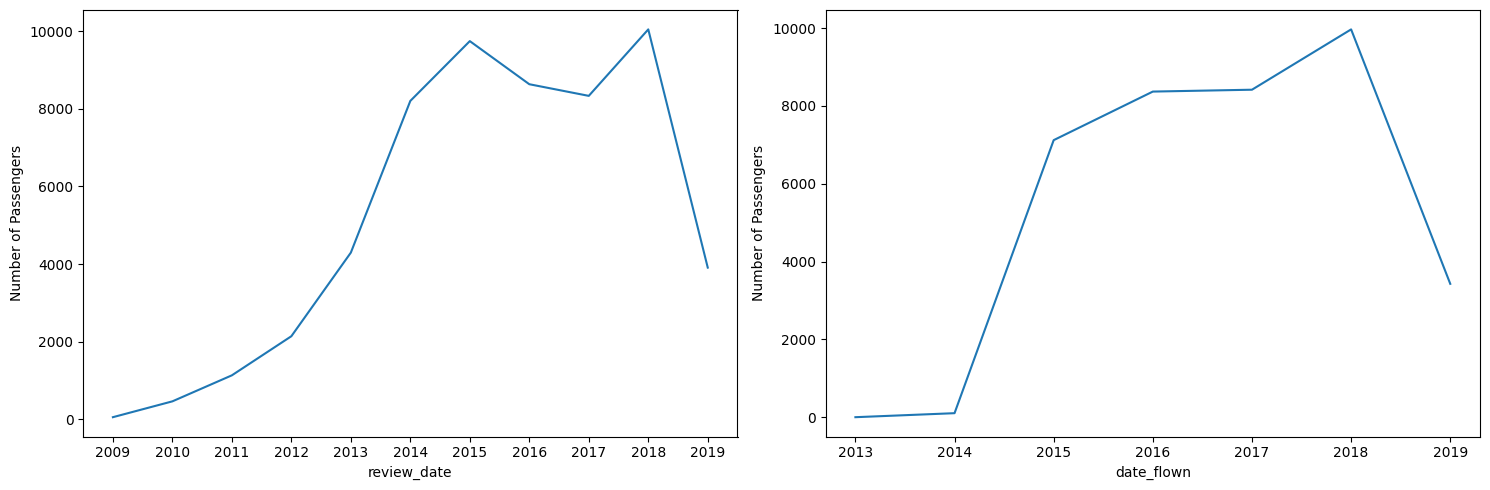

In [31]:
# Chart - 4 visualization code
#Question-4: What is the historical passenger trend based on review dates and flight dates, and how do they differ?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
airline_df.groupby(airline_data.review_date.dt.year)['review_date'].count().plot(ylabel='Number of Passengers',xticks=range(2009,2020))

plt.subplot(1,2,2)
airline_df.groupby(airline_data.date_flown.dt.year)['date_flown'].count().plot(ylabel='Number of Passengers',xticks=range(2013,2020))

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The line plot was chosen for visualizing historical passenger trends based on review dates and flight dates because it effectively showcases temporal patterns over the years and allows for a direct comparison between the two trends, offering insights into passenger counts' evolution over time.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the line plot depicting historical passenger trends based on review dates and flight dates are as follows:

1. **Review Dates Trend:** Over the years, there is a noticeable increase in the number of passenger reviews, with a significant uptick from around 2013 onwards. However, there is a slight decrease in reviews in late 2016 and early 2017, followed by a resurgence in 2018. This suggests an increasing trend in customer feedback and engagement with the airline's services.

2. **Flight Dates Trend:** Over the years, there is a noticeable increase in the number of passengers who traveled, with a significant uptick from around 2014 onwards and another peak in 2018. The trend in the number of passengers based on flight dates is relatively consistent over the years, with slight variations. While there is no significant upward or downward trend, the number of passengers remains relatively stable.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the historical passenger trend analysis based on review dates and flight dates have the potential to create a positive business impact. However, there are also insights that could raise concerns related to negative growth. Let's examine both aspects:

**Positive Business Impact:**

1. **Increasing Customer Engagement:** The significant increase in passenger reviews over the years indicates that customers are increasingly engaging with the airline's services. This presents an opportunity for airlines to harness this feedback for service improvements and build stronger customer relationships, ultimately leading to positive business impact.

2. **Stable Passenger Count:** The relatively stable trend in the number of passengers based on flight dates, with occasional peaks, suggests that the airline has maintained a consistent customer base. This stability provides a foundation for reliable revenue streams and operational planning.

**Negative Growth:**

1. **Review Fluctuations:** The fluctuations in review counts, such as the slight decrease in late 2016 and early 2017, followed by a resurgence, could potentially indicate issues or disruptions that negatively impacted customer experiences. Unaddressed concerns from these periods could lead to negative growth if not addressed promptly.

2. **Limited Passenger Growth:** While the number of reviews has increased significantly, the actual number of passengers based on flight dates has remained relatively steady. This may indicate that the airline is not attracting a significantly larger customer base. Failing to expand the customer base could limit revenue growth in the long term.



###Bivariate Analysis

#### Chart - 5

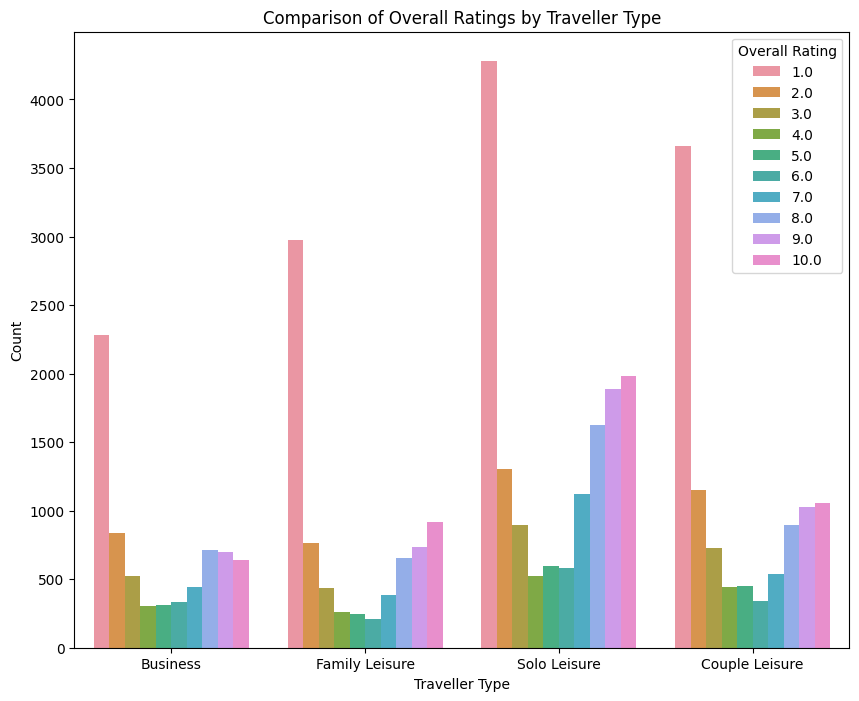

In [32]:
# Chart - 5 visualization code

#Question-5: how does overall rating effects traveller_type ?

# Set the color palette
sns.set_palette('crest')

# Create a grouped bar plot to compare overall ratings by traveller_type
plt.figure(figsize=(10, 8))
sns.countplot(data=airline_df, x='traveller_type', hue='overall')
plt.title('Comparison of Overall Ratings by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.legend(title='Overall Rating')

# Show the plot
plt.show()




##### 1. Why did you pick the specific chart?

A grouped bar plot was chosen to visualize how overall ratings affect different traveler types. This chart allows for a direct comparison of how various traveler types rate their experiences, providing insights into how overall ratings are distributed within each category.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the grouped bar plot comparing overall ratings by traveler type are as follows:

1. **Overall Rating Distribution:** The chart reveals that overall ratings are broadly distributed across different traveler types. There is a noticeable concentration of ratings around 1, indicating that many customers tend to give low ratings, which suggests a significant number of dissatisfied customers.

2. **Polarized Opinions:** The presence of peaks at ratings 8, 9, and 10 suggests that some customers provide very high ratings, indicating extreme satisfaction. This polarization in customer opinions, with a significant number expressing either extreme satisfaction or dissatisfaction, highlights the variability in experiences among different traveler types.

3. **Traveller Types:** The chart categorizes traveler types, including "Solo Leisure," "Couple Leisure," "Family Leisure," and "Business." It allows for a comparison of how each traveler type rates their experiences, providing insights into how overall ratings are distributed within each category.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart comparing overall ratings by traveler type can have both positive and potentially negative implications for a business. Here's an analysis:

**Positive Business Impact:**

1. **Understanding Customer Preferences:** By examining how different traveler types rate their experiences, businesses can gain valuable insights into customer preferences. This understanding can inform targeted marketing strategies and service improvements to cater to specific traveler segments, potentially leading to increased customer satisfaction and loyalty.

2. **Identifying High Satisfaction:** The presence of high ratings (8, 9, and 10) among certain traveler types indicates segments of highly satisfied customers. Businesses can leverage this information to identify areas of strength and excellence in their services and promote them to attract similar customers.

**Negative Growth :**

1. **Low Ratings Concentration:** The concentration of low ratings (around 1) among some traveler types suggests a significant number of dissatisfied customers within those segments. This could lead to negative word-of-mouth, reduced customer retention, and potential revenue loss if these issues are not addressed promptly.

2. **Polarized Opinions:** The polarization of opinions, with extreme ratings at both ends of the spectrum, indicates that customer experiences can vary widely. Negative reviews from dissatisfied customers could impact the reputation of the business and deter potential customers from booking services.



#### Chart - 6

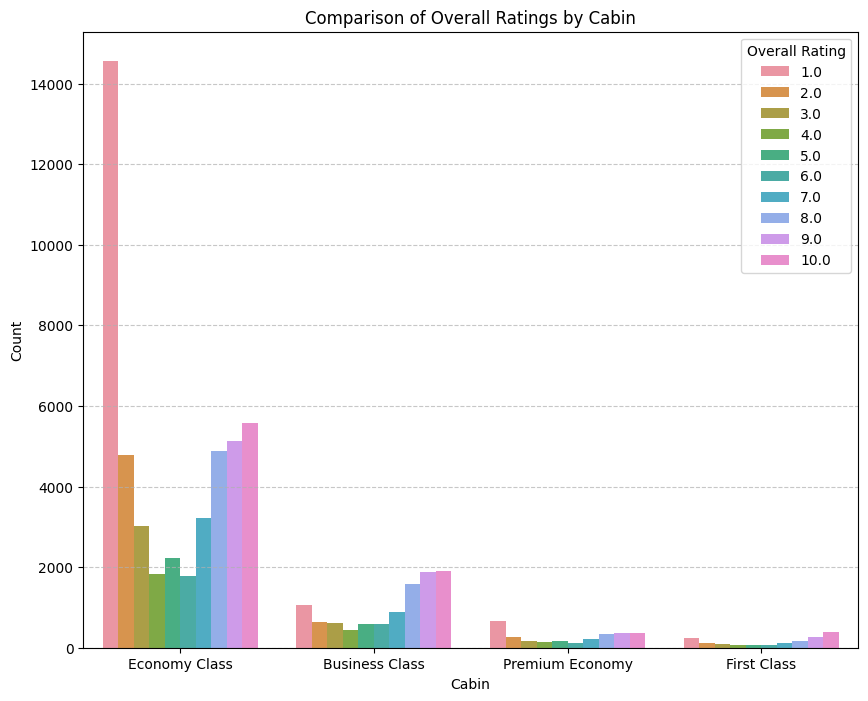

In [33]:
# Chart - 6visualization code
#Question-6: how does overall rating effects cabin ?

# Set the color palette
sns.set_palette('crest')

# Create a grouped bar plot to compare overall ratings by traveller_type
plt.figure(figsize=(10, 8))
sns.countplot(data=airline_df, x='cabin', hue='overall')
plt.title('Comparison of Overall Ratings by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.legend(title='Overall Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar plot was chosen to visualize how overall ratings affect different cabin types. This chart allows for a direct comparison of how various cabin types are rated by customers, providing insights into how overall ratings are distributed within each category.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the grouped bar plot comparing overall ratings by cabin type are as follows:

1. **Overall Rating Distribution:** The chart reveals that overall ratings are distributed across different cabin types. Each cabin type category (e.g., "Economy," "Business," "First") shows a range of overall ratings, indicating that customers across all cabin types provide varying levels of feedback.

2. **High Ratings in Some Cabin Types:** Certain cabin types, such as "First" class, exhibit higher counts of very high overall ratings (8, 9, and 10). This suggests that customers in these premium cabins tend to express higher levels of satisfaction.

3. **Variability in Economy Cabin:** The "Economy" cabin category displays a wide range of overall ratings, including lower ratings (around 1) and higher ratings (8 and above). This variability in ratings within the "Economy" class indicates that customers have diverse experiences in this cabin type.

4. **Polarized Opinions:** Similar to previous insights, there is evidence of polarized opinions, with both very low and very high ratings present within each cabin type. This suggests that customers in all cabin types have varying levels of satisfaction and dissatisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart comparing overall ratings by cabin type can have both positive and potentially negative implications for a business. Here's an analysis:

**Positive Business Impact:**

1. **Identifying High Satisfaction in Premium Cabins:** The chart highlights that certain premium cabin types, such as "First" class, receive higher overall ratings, indicating higher levels of customer satisfaction. This information can be leveraged to promote premium cabins and attract customers seeking a superior experience, potentially leading to increased revenue and positive brand perception.

2. **Understanding Variability in Economy Cabin:** Recognizing the wide range of overall ratings within the "Economy" cabin category allows businesses to address areas of improvement and enhance the quality of services in this class. Improving customer experiences in the Economy cabin can lead to increased customer loyalty and positive word-of-mouth.

**Negative Growth :**

1. **Polarized Opinions in All Cabins:** The presence of both very low and very high overall ratings within each cabin type suggests that customer experiences are polarized. While high ratings are positive, low ratings may indicate dissatisfaction and potential issues. Negative reviews can deter potential customers from booking certain cabin types and may lead to revenue loss.

2. **Variability in Economy Cabin:** The wide range of overall ratings in the "Economy" cabin category could indicate inconsistency in service quality. Inconsistent experiences can lead to negative customer perceptions, affecting brand reputation and customer retention.



#### Chart - 7

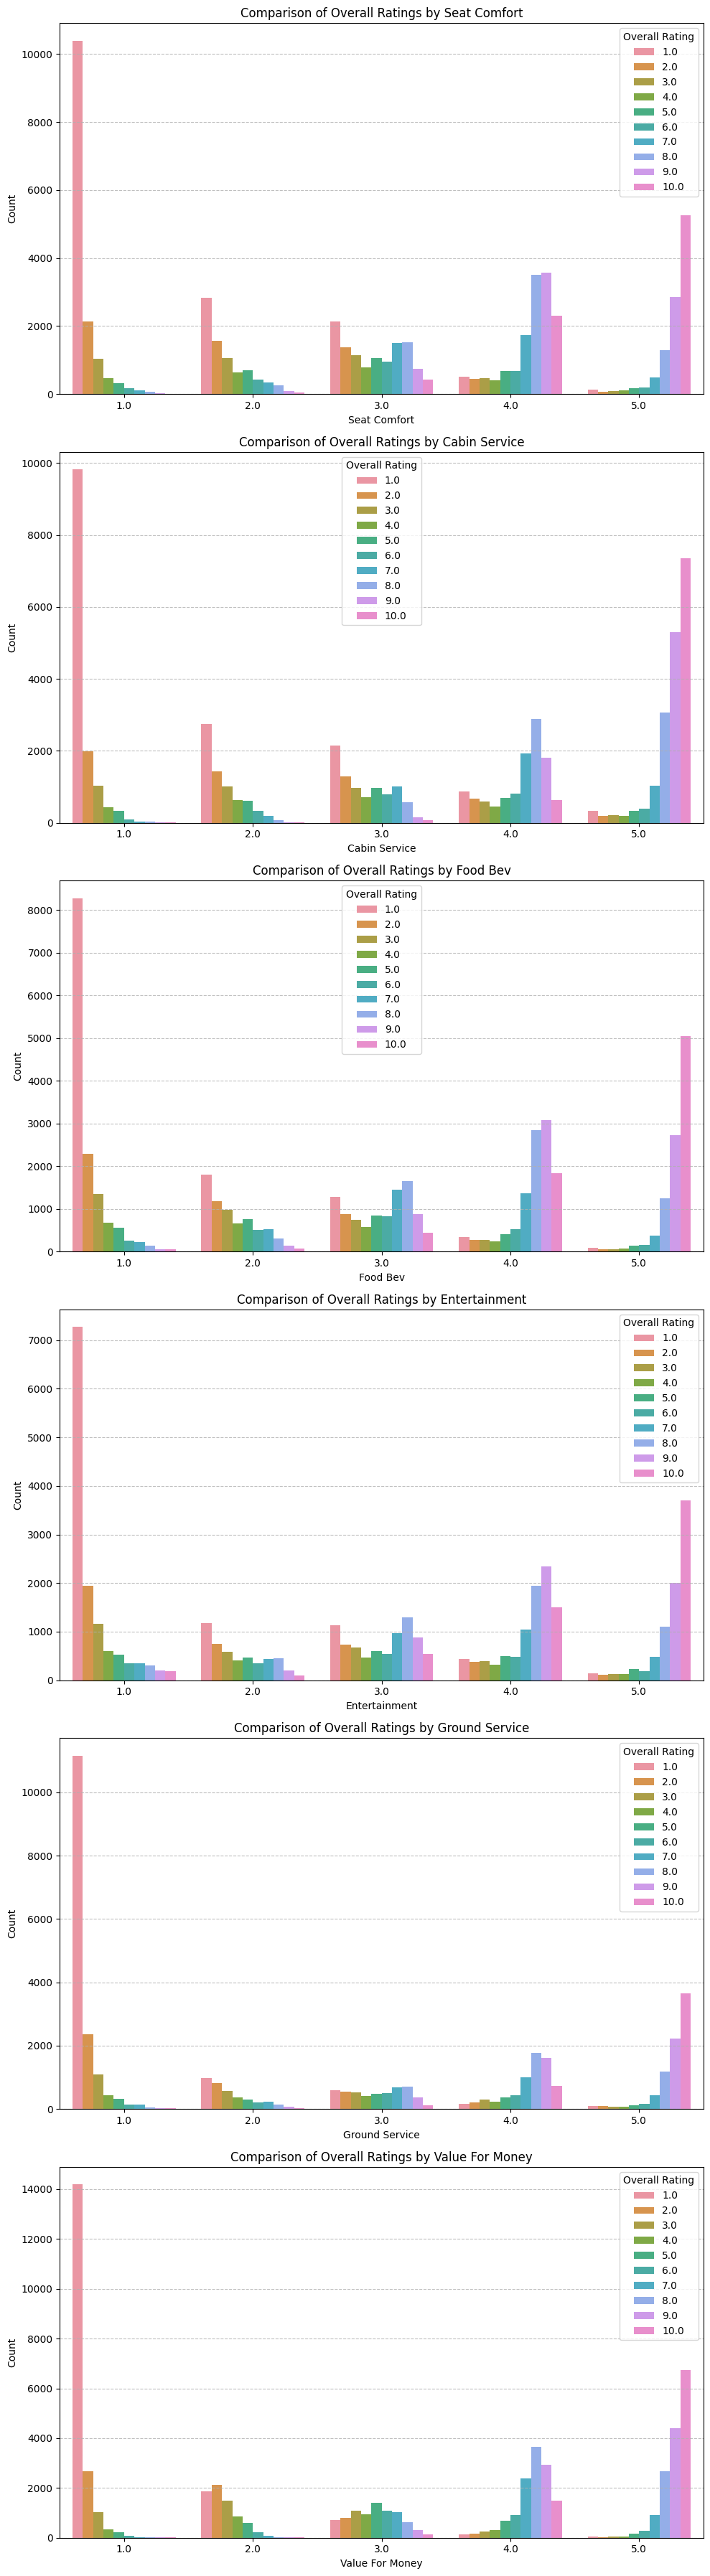

In [34]:
# Chart - 7 visualization code
#Question-7:How does overall rating affected by other ratings?


# List of ratings columns to compare with 'overall'
ratings_columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set the color palette
sns.set_palette('crest')

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 6 * len(ratings_columns)))

# Loop through each ratings column and create a count plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.countplot(data=airline_df, x=column, hue='overall', ax=ax)
    ax.set_title(f'Comparison of Overall Ratings by {column.replace("_", " ").title()}')
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.legend(title='Overall Rating')
    ax.grid(axis='y', linestyle='--', alpha=0.8)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A series of count plots was chosen to visualize how overall ratings are affected by seat_comfort, cabin_service, food_bev, entertainment, ground_service & value_for_money ratings, as they effectively display the distribution of overall ratings for each level of individual ratings, enabling a comprehensive analysis of their relationship.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the series of count plots showing how overall ratings are affected by other ratings are as follows:

1. **Seat Comfort Influence:** Customers who rate "Seat Comfort" highly (e.g., ratings 4 and 5) tend to give higher overall ratings (8, 9, and 10). Conversely, those who rate seat comfort lower (e.g., ratings 1 and 2) tend to provide lower overall ratings.

2. **Cabin Service Impact:** Higher ratings for "Cabin Service" correspond to higher overall ratings (8, 9, and 10), indicating a positive influence of cabin service on the overall experience. Lower cabin service ratings (e.g., 1 and 2) result in lower overall ratings.

3. **Food and Beverage Relationship:** Customers who rate "Food and Beverage" highly (e.g., ratings 4 and 5) tend to give higher overall ratings. However, there is also a substantial count of customers who provide lower overall ratings despite positive food and beverage ratings.

4. **Entertainment's Influence:** Similar to other factors, positive "Entertainment" ratings coincide with higher overall ratings (8, 9, and 10). Lower entertainment ratings (e.g., 1 and 2) correspond to lower overall ratings.

5. **Ground Service and Value for Money:** Higher "Ground Service" and "Value for Money" ratings generally align with higher overall ratings (8, 9, and 10). Conversely, lower ratings for these aspects tend to result in lower overall ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of how overall ratings are affected by other ratings can indeed help create a positive business impact. Here's a breakdown of the potential impact and areas of concern:

**Positive Business Impact:**

1. **Enhancing Customer Experience:** Understanding the positive influence of factors like seat comfort, cabin service, and entertainment on overall ratings allows businesses to prioritize these aspects. Investing in improving these elements can lead to increased customer satisfaction and positive reviews, ultimately attracting more customers.

2. **Identifying Key Drivers of Satisfaction:** By recognizing that certain factors have a strong positive correlation with overall ratings, businesses can focus their efforts on delivering excellence in these areas. This can result in higher customer retention and loyalty, contributing to positive growth.

**Areas of Concern:**

1. **Inconsistent Food and Beverage Impact:** While positive ratings for food and beverage quality generally correspond to higher overall ratings, there is variability. Some customers provide lower overall ratings despite positive food and beverage ratings. This inconsistency highlights the need for consistent quality in this aspect to avoid potential negative impacts on overall ratings.

2. **Value for Money Influence:** Positive ratings for value for money contribute to higher overall ratings, but there is room for improvement. If customers perceive that they are not receiving value for their money, it can lead to lower overall ratings. Ensuring competitive pricing and demonstrating the value of services can mitigate this concern.


#### Chart - 8

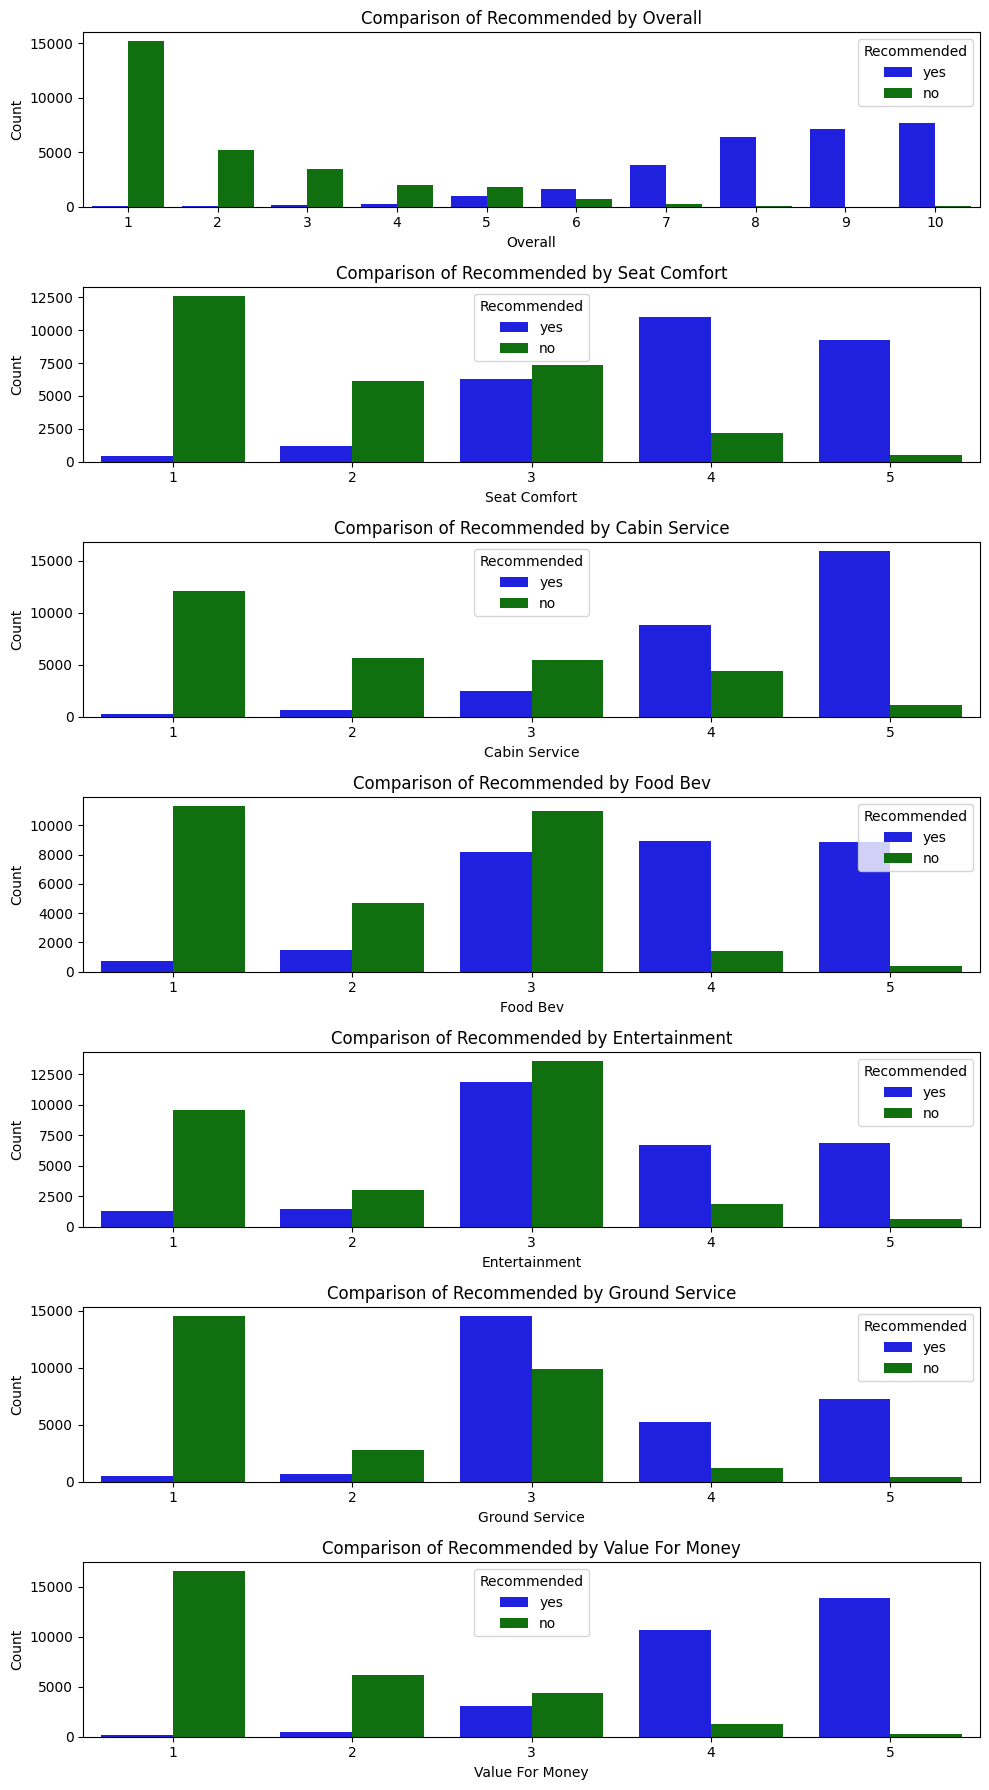

In [35]:
# Chart - 8 visualization code
#Question-8:How does recommended affected by all types of ratings?

# List of ratings columns to compare with 'recommended'
ratings_columns = ['overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 18))

# Loop through each ratings column and create a count plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.countplot(data=airline_data, x=column, hue='recommended',palette=["blue","green"], ax=ax)
    ax.set_title(f'Comparison of Recommended by {column.replace("_", " ").title()}')
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.legend(title='Recommended')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A series of count plots was chosen to visualize how the "Recommended" feature is affected by different types of ratings. Count plots effectively display the distribution of recommended and not recommended instances for each level of individual ratings, enabling a comprehensive analysis of their relationship. The use of different colors for "Recommended" and "Not Recommended" makes it easier to distinguish between the two, aiding in the analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the series of count plots showing how "Recommended" is affected by different types of ratings are as follows:

1. **Overall Rating Influence:** Customers who give higher overall ratings (8, 9, and 10) are more likely to recommend the airline. Conversely, those who provide lower overall ratings (1 to 5) are less likely to recommend it.

2. **Seat Comfort:** Positive seat comfort ratings (4 and 5) are associated with a higher likelihood of recommending the airline. Conversely, lower seat comfort ratings (1 and 2) correspond to a decreased likelihood of recommendation.

3. **Cabin Service Impact:** Higher cabin service ratings (4 and 5) are strongly associated with recommending the airline. Conversely, lower cabin service ratings (1 and 2) result in a lower likelihood of recommendation.

4. **Food and Beverage:** Positive food and beverage ratings (4 and 5) align with a higher likelihood of recommending the airline. However, there is still a significant number of recommendations even with lower ratings in this category.

5. **Entertainment's Influence:** Positive entertainment ratings (4 and 5) are linked to a higher likelihood of recommending the airline. However, similar to food and beverage, there are still recommendations with lower entertainment ratings.

6. **Ground Service and Value for Money:** Higher ground service and value for money ratings (4 and 5) coincide with a higher likelihood of recommendation. However, recommendations are still present, even with lower ratings in these aspects.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of how "Recommended" is affected by various types of ratings can indeed help create a positive business impact, but they also highlight potential areas of concern:

**Positive Business Impact:**

1. **Enhanced Customer Experience:** Understanding that higher overall ratings and positive ratings in specific categories like seat comfort, cabin service, and value for money lead to a higher likelihood of recommendation is valuable. Businesses can prioritize and invest in improving these aspects to enhance the overall customer experience. This can result in increased customer satisfaction, loyalty, and positive word-of-mouth, leading to positive business growth.

2. **Tailored Marketing:** Businesses can leverage these insights to target marketing efforts towards customers who have provided higher ratings and are more likely to recommend the airline. This targeted approach can result in more effective marketing campaigns and potentially attract new customers.

**Areas of Concern:**

1. **Influence of Lower Ratings:** The insights suggest that even customers who provide lower ratings in certain categories (e.g., food and beverage or entertainment) may still recommend the airline. This raises concerns about consistency in service quality. If customers consistently receive subpar experiences in certain aspects but still recommend the airline, it could lead to negative growth over time as dissatisfaction spreads.

2. **Negative Impact of Overall Rating:** Conversely, the insights also reveal that customers who provide lower overall ratings (1 to 5) are less likely to recommend the airline. If overall ratings continue to be low, it can negatively affect the airline's reputation, customer retention, and growth potential.



#### Chart - 9

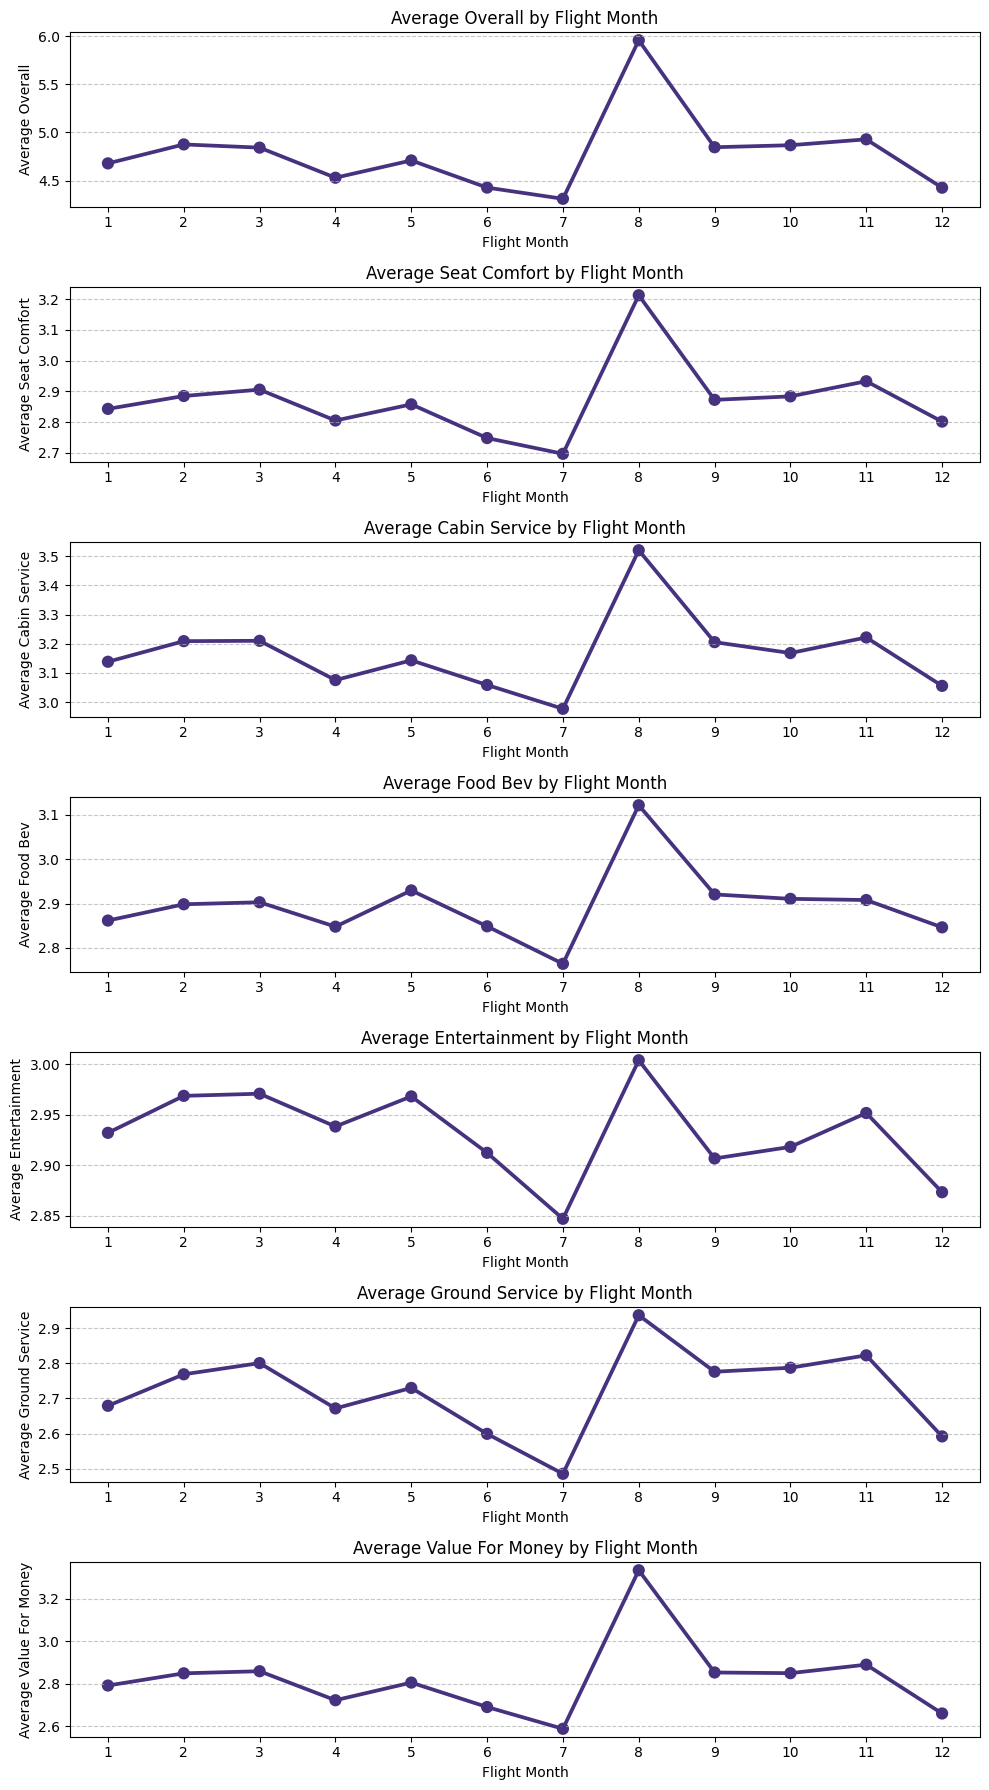

In [36]:
# Chart - 9 visualization code
#Question-9 :What is the impact of flight month on all ratings?


# List of ratings columns to analyze
ratings_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set the color palette
sns.set_palette('viridis')

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 18))

# Loop through each ratings column and create a point plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.pointplot(data=airline_data, x='flown_month', y=column, ci=None, ax=ax)
    ax.set_title(f'Average {column.replace("_", " ").title()} by Flight Month')
    ax.set_xlabel('Flight Month')
    ax.set_ylabel(f'Average {column.replace("_", " ").title()}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a point plot for visualizing the impact of flight month on all ratings because it allows us to see the average rating values for each month, making it easier to identify trends or patterns over time. Point plots are effective for comparing data across different categories, in this case, the months, and they provide a clear representation of how ratings change throughout the year. This type of plot is particularly suitable for showing variations in numerical data across multiple categories, making it a valuable choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the point plot depicting the impact of flight month on all ratings are as follows:

1. **Overall Ratings:** Overall ratings exhibit a pattern where they are relatively stable from January to June. However, there is a sudden peak in August (the 8th month) followed by a gradual decrease in September (the 9th month). This suggests that there may be seasonal factors or events affecting customer perceptions and overall ratings during this period.

2. **Seat Comfort:** Seat comfort ratings show a similar trend, with a noticeable increase in August followed by a slight decline in September. This aligns with the pattern observed in overall ratings, indicating that seat comfort might contribute to the overall rating variations during this period.

3. **Cabin Service:** Cabin service ratings follow a similar pattern, with a peak in August and a subsequent decrease in September. This suggests that customers' experiences with cabin service also impact overall ratings during these months.

4. **Food and Beverage:** Food and beverage ratings show a relatively consistent pattern without significant fluctuations throughout the year. There is no apparent spike in August, indicating that food and beverage quality may not be a primary driver of the observed overall rating variations during that month.

5. **Entertainment:** Entertainment ratings exhibit a similar trend to food and beverage, with no significant fluctuations in August. This suggests that entertainment quality may not play a significant role in the observed peak in overall ratings during that month.

6. **Ground Service:** Ground service ratings also follow a relatively stable pattern throughout the year, with no distinct peak in August. Ground service quality does not appear to be a major factor contributing to the overall rating variations during that month.

7. **Value for Money:** Value for money ratings show a consistent pattern with no abrupt changes in August. This suggests that customers' perceptions of value for money may not be the primary driver of the observed fluctuations in overall ratings during that month.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the impact of flight month on ratings can potentially help create a positive business impact.

**Positive Business Impact:**
1. **Targeted Improvements:** Airlines can use this insight to focus on enhancing seat comfort and cabin service during the peak months of August to maintain or improve customer satisfaction. By identifying and addressing the factors contributing to positive ratings during this time, airlines can tailor their services to meet customer expectations.

2. **Marketing Opportunities:** Airlines can leverage the positive ratings observed in August for marketing and promotional campaigns. Highlighting customer satisfaction during this period can attract more passengers and boost bookings for those months.

3. **Operational Planning:** Airlines can plan their flight schedules, staffing, and maintenance activities with the knowledge that August experiences higher customer satisfaction. This can help optimize resource allocation and operational efficiency.

Regarding negative growth, the insights do not directly indicate negative trends but rather fluctuations in ratings during specific months. To identify negative growth, it would be necessary to examine long-term trends and patterns beyond the scope of this analysis.

#### Chart - 10

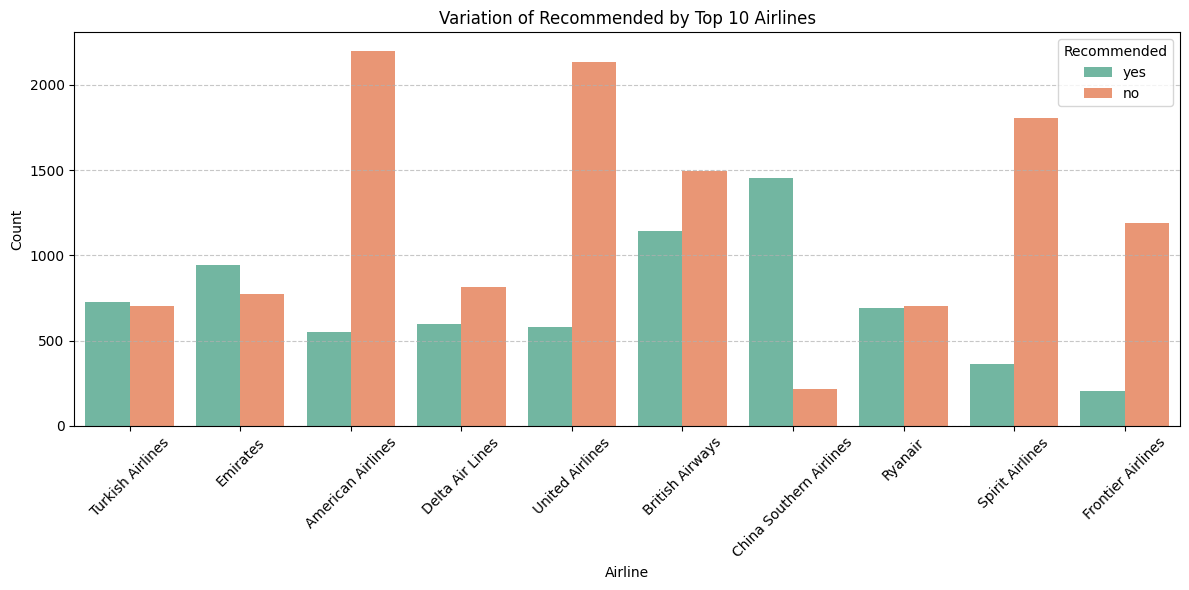

In [37]:
# Chart - 10 visualization code
#Question-10: how recommended feature varies for top airlines?


# Get the top 10 airlines with the highest counts
top_10_airlines = airline_data['airline'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 airlines
top_10_airlines_data = airline_data[airline_data['airline'].isin(top_10_airlines)]

# Set the color palette
sns.set_palette('Set2')

# Create a count plot to visualize recommendations for the top 10 airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_airlines_data, x='airline', hue='recommended')
plt.title('Variation of Recommended by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Recommended')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose the count plot to visualize the variation of the "recommended" feature for the top 10 airlines because it effectively displays how the recommendation behavior varies among these airlines. This type of plot allows for a clear comparison of the count of recommendations (yes or no) for each of the top airlines. By using different colors for "recommended" and "not recommended," it helps identify which airlines have a higher percentage of positive recommendations and which do not. This visualization is suitable for understanding customer sentiment and recommendations for different airlines in a straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

insights those are found are

1. **Recommendation:** These airlines stand out with a significantly higher count of recommendations ("yes") compared to non-recommendations ("no"). This indicates that a substantial portion of their customers had positive experiences and are inclined to recommend these airlines.

2. **Non recommendation:** In contrast, China Southern Airlines has a notably higher count of non-recommendations ("no") than recommendations ("yes"). This suggests that a significant portion of their customers had negative experiences and are less likely to recommend the airline.

3. **Mixed Behaviour:** The remaining airlines in the top 10 exhibit a more balanced distribution of recommendations ("yes") and non-recommendations ("no"). This balanced pattern suggests mixed customer experiences, with both positive and negative sentiments.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of customer recommendations can indeed help create a positive business impact for airlines. Here's how:

1. **Positive Impact:** Airlines such as American Airlines, United Airlines, Spirit Airlines, and Frontier Airlines, which receive significantly more recommendations than non-recommendations, can leverage these positive sentiments to bolster their marketing strategies. They can highlight customer satisfaction and positive reviews in their promotional materials, potentially attracting more customers and improving their brand image.

2. **Negative Impact:** On the other hand, airlines like China Southern Airlines, which receive a higher count of non-recommendations, need to address the issues leading to negative customer experiences. By identifying and resolving these pain points, they can work toward improving customer satisfaction and loyalty. Failure to address these issues could lead to negative growth, as dissatisfied customers may choose other airlines, impacting revenue and reputation.



#### Chart - **11**

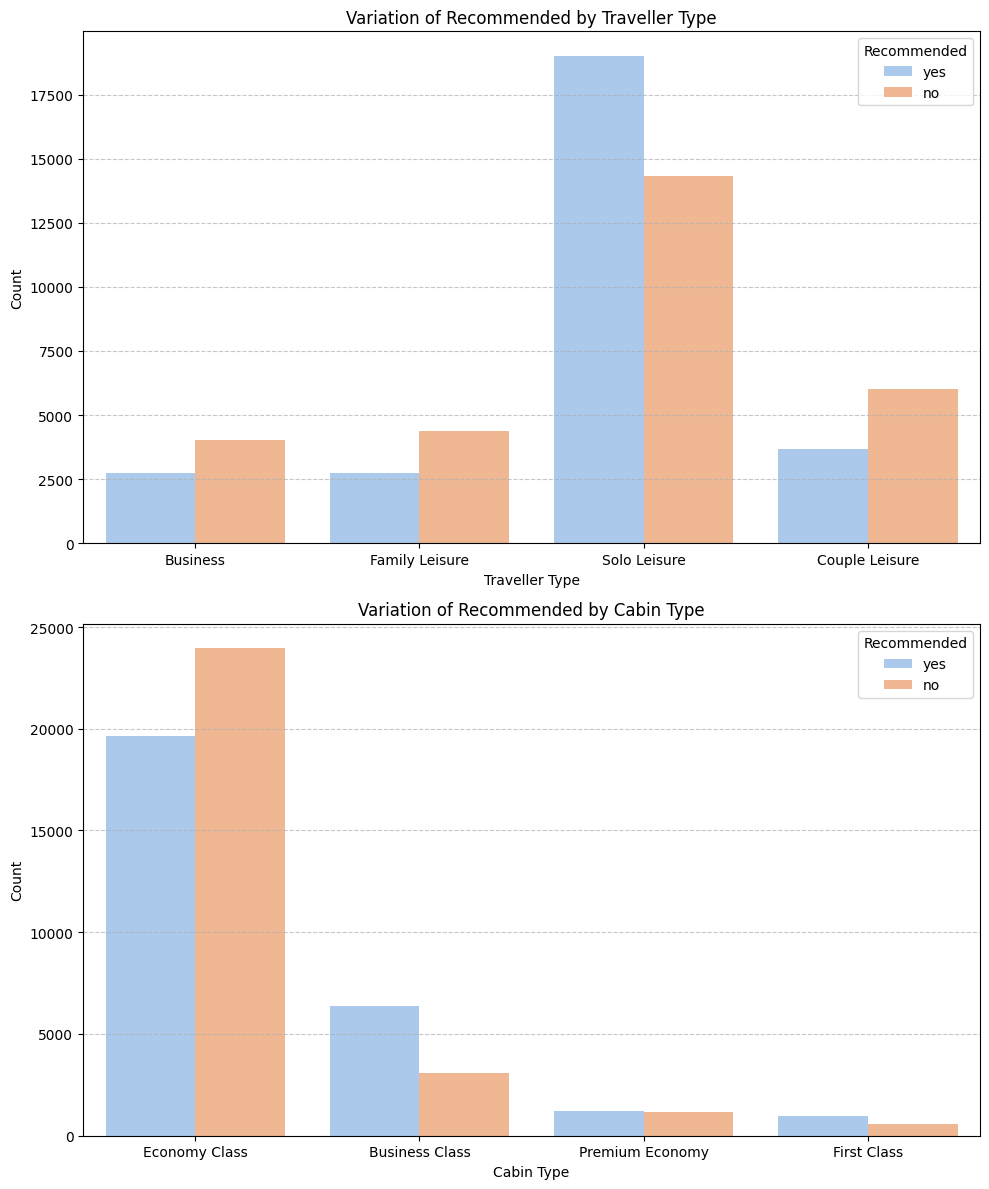

In [38]:
# Chart - 11 visualization code
#Question-11:how recommended feature varies for traveller_type and cabin?

# Set the color palette
sns.set_palette('pastel')

# Create a grid of subplots for 'traveller_type' and 'cabin'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Create a count plot for 'recommended' vs. 'traveller_type'
sns.countplot(data=airline_data, x='traveller_type', hue='recommended', ax=axes[0])
axes[0].set_title('Variation of Recommended by Traveller Type')
axes[0].set_xlabel('Traveller Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Recommended')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Create a count plot for 'recommended' vs. 'cabin'
sns.countplot(data=airline_data, x='cabin', hue='recommended', ax=axes[1])
axes[1].set_title('Variation of Recommended by Cabin Type')
axes[1].set_xlabel('Cabin Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Recommended')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout and show the plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I chose the count plot for these visualizations because it effectively displays the distribution of the 'recommended' feature within different categories of 'traveller_type' and 'cabin'. This type of chart allows us to compare the count of recommendations (positive sentiment) and non-recommendations (negative sentiment) within each category, providing insights into how different traveler types and cabin types influence recommendations.

The count plot is suitable for this analysis as it helps us understand how 'recommended' varies across categorical variables, making it easier to identify patterns and differences in passenger recommendations based on these categories.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

1. **Traveller Type vs. Recommended:** Among different traveler types, "Solo Leisure" travelers have a notably higher count of recommendations (positive sentiment) compared to non-recommendations (negative sentiment). This suggests that solo leisure travelers tend to have more positive experiences with the airline and are more likely to recommend it.

2. **Cabin Type vs. Recommended:** In terms of cabin types, the "Economy" cabin shows a higher count of non-recommendations (negative sentiment) compared to recommendations (positive sentiment). This indicates that passengers in the economy cabin may have mixed or negative experiences more frequently than passengers in other cabin types.

These insights highlight variations in recommendations based on traveler type and cabin type, with solo leisure travelers generally having a more positive sentiment, while the economy cabin tends to receive more negative sentiment in terms of recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by allowing airlines to tailor their services and strategies more effectively. However, there are also insights that could be concerning for airlines:

Positive Impact :
1. **Solo Leisure Travelers:** Airlines can focus on catering to the needs and preferences of solo leisure travelers, as they are more likely to have positive experiences and recommend the airline. This could lead to increased customer loyalty and positive word-of-mouth recommendations.

Negative Growth :
1. **Economy Cabin:** The higher count of non-recommendations in the economy cabin indicates that passengers in this class may have more negative experiences. Airlines may need to address issues related to economy class services, such as comfort, amenities, or customer service, to improve customer satisfaction and reduce negative sentiment.



###Multivariate Analysis

#### Chart - **12** - Correlation Heatmap

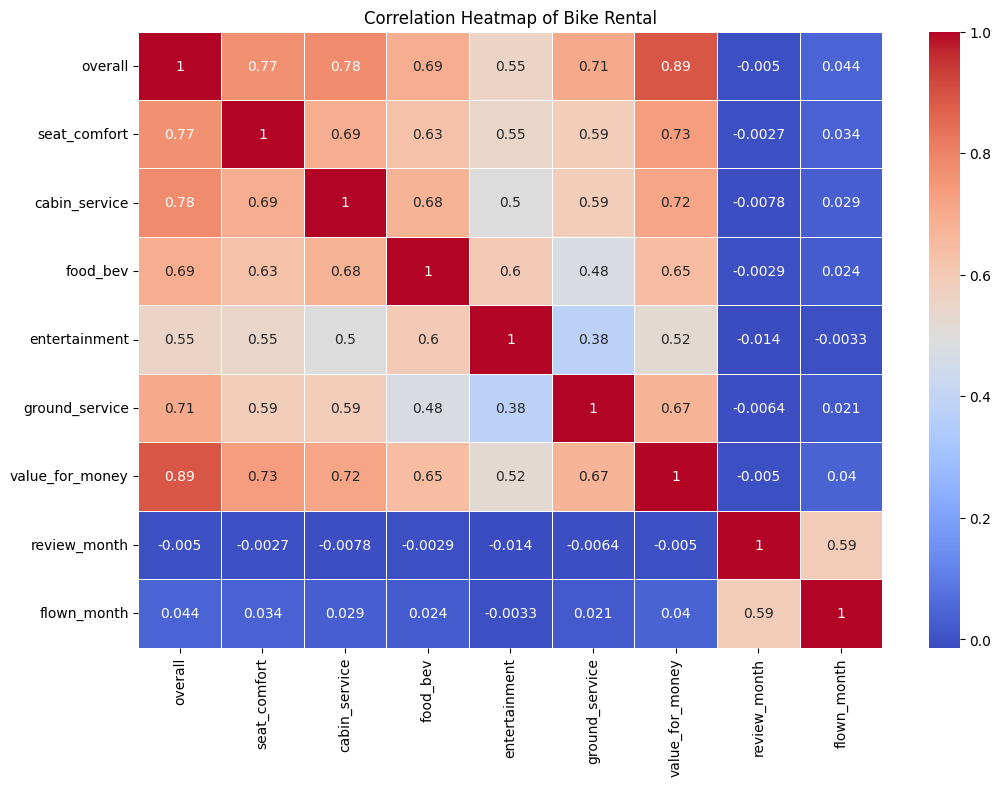

In [39]:
# Correlation Heatmap visualization code

#Select numeric column
numeric = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
           'ground_service', 'value_for_money','review_month','flown_month']

#Find the co-relation matrix
corelation=airline_data[numeric].corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bike Rental')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is chosen for visualizing correlations because it provides a quick and comprehensive view of relationships between multiple variables through color-coded representations. This efficient visualization helps identify patterns and assists in decision-making, such as feature selection or improving customer experience strategies in a business context.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix and heatmap provide insights into the relationships between different features in the dataset. Here are the insights drawn from the provided correlation heatmap:

1. **High Positive Correlations:**
   - Features such as "Overall" have high positive correlations with other rating features like "Seat Comfort," "Cabin Service," "Food and Beverage," "Ground Service," and "Value for Money." This suggests that customers who rate one aspect of their experience positively tend to rate other aspects positively as well.

2. **Review Month and Flown Month Correlation:**
   - "Review Month" and "Flown Month" have a positive correlation of 0.589706. This indicates that there is a moderate positive relationship between the month in which the review was posted and the month in which the flight was taken. Customers tend to review their flights in the same or nearby months when they actually flew.

3. **Value for Money and Overall Rating:**
   - "Value for Money" has a very high positive correlation of 0.892803 with the "Overall" rating. This suggests that passengers who perceive they received good value for money are more likely to provide higher overall ratings.

4. **Entertainment and Other Ratings:**
   - "Entertainment" has relatively lower positive correlations with other ratings. Passengers' satisfaction with entertainment services doesn't strongly correlate with their satisfaction with other aspects like seat comfort or food and beverage.

5. **Low Correlation with Review Month:**
   - Most of the ratings and features have very low or almost negligible correlations with the "Review Month." This indicates that the month in which a review is posted does not strongly influence the ratings.

6. **Low Negative Correlation with Review Month:**
   - All features have low negative correlations with "Review Month," indicating that the month of the review does not significantly impact the ratings in a negative way.



#### Chart - 13 - Pair Plot

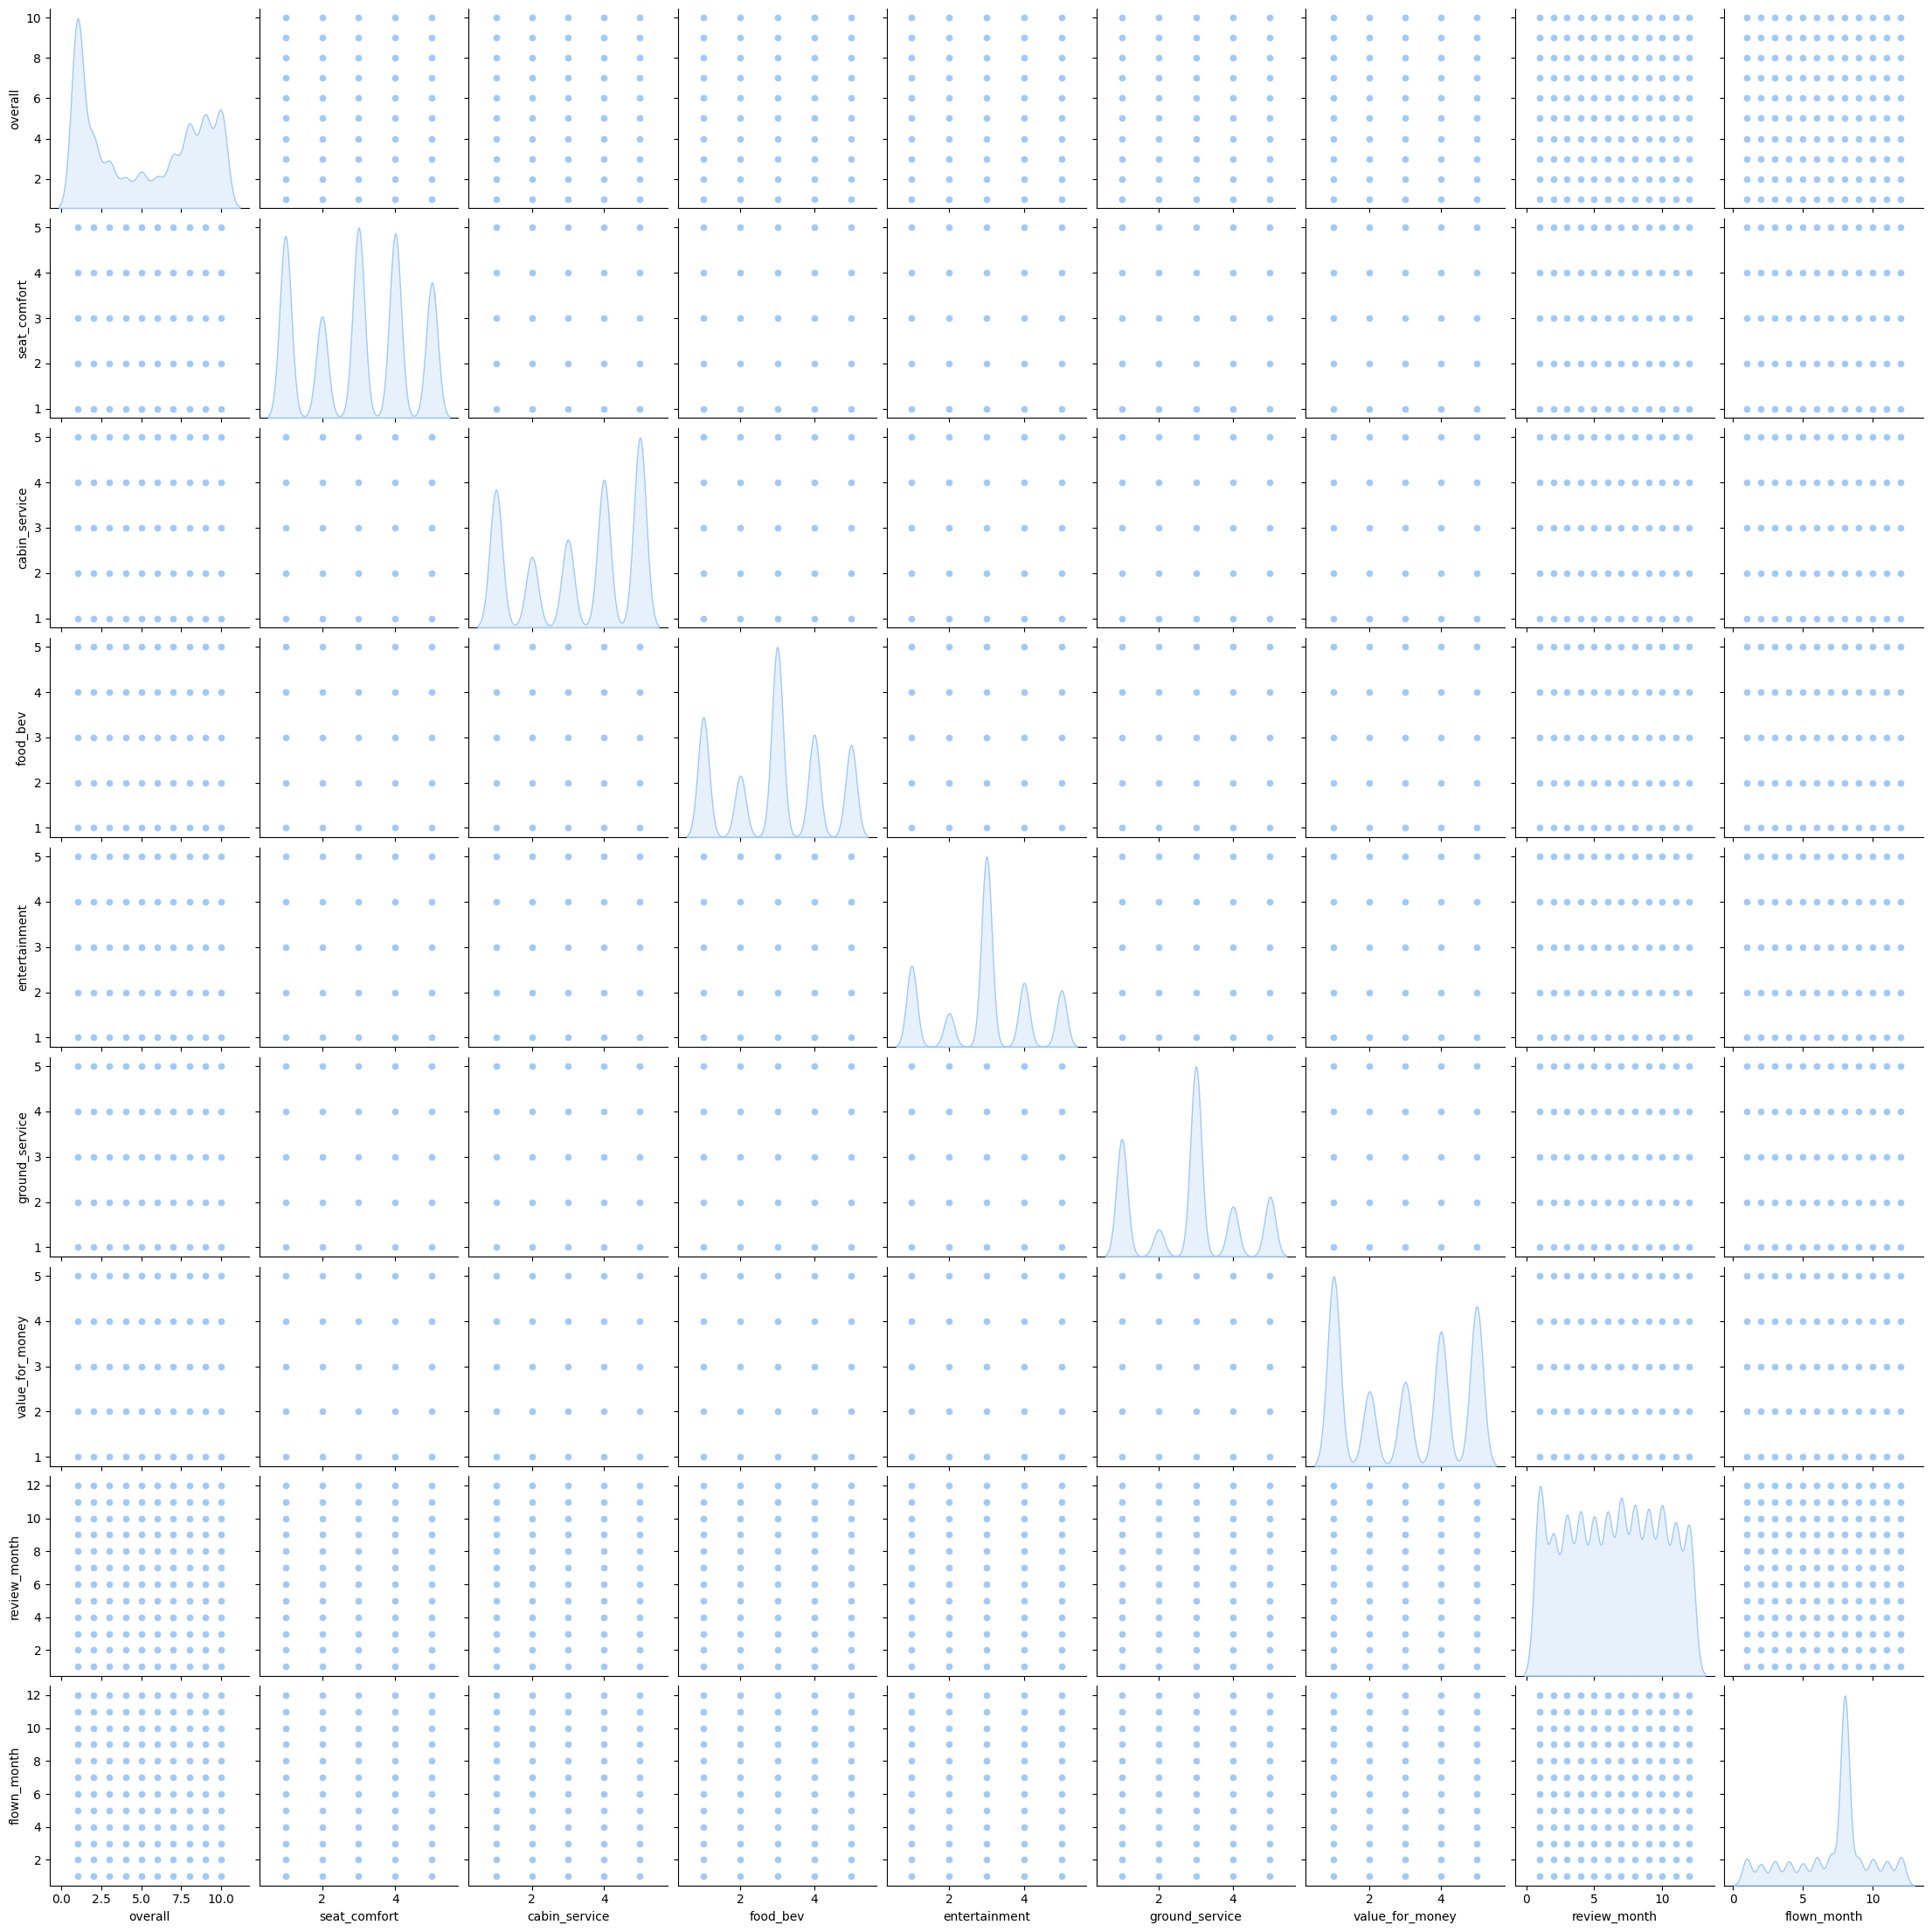

In [40]:
# Pair Plot visualization code
# Create a pair plot using seaborn
sns.pairplot(airline_data[numeric],diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is selected because it allows us to visualize pairwise relationships between numerical variables in the dataset. It's particularly useful when exploring the correlations and distributions between multiple numeric features simultaneously, which is essential for understanding how variables interact with each other and identifying potential patterns or trends in the data. This type of visualization is helpful for data exploration and gaining insights into the dataset's structure and relationships.

##### 2. What is/are the insight(s) found from the chart?

Insights from the pair plot visualization of the selected columns are as follows:

**Overall Satisfaction vs Other Ratings:**
- The overall satisfaction rating (overall) is positively correlated with all other ratings, indicating that passengers who give higher ratings in specific categories also tend to give higher overall ratings.
- The strongest positive correlation is observed between overall satisfaction and "value for money" (0.906), followed by "ground service" (0.846) and "cabin service" (0.795).

**Seat Comfort and Cabin Service:**
- "Seat comfort" and "cabin service" are moderately positively correlated (0.733), suggesting that passengers who rate seat comfort higher also tend to rate cabin service higher, and vice versa.

**Ground Service and Value for Money:**
- "Ground service" and "value for money" are positively correlated (0.796), indicating that passengers who perceive better ground services also tend to rate the airline's value for money more favorably.

**Food and Beverage and Entertainment:**
- "Food and beverage" and "entertainment" are positively correlated (0.610), suggesting that passengers who rate the quality of food and beverage higher also tend to rate the entertainment options higher.

**Entertainment and Ground Service:**
- "Entertainment" and "ground service" have a weaker positive correlation (0.470), indicating a mild relationship between the two. Passengers who find entertainment satisfying may also perceive better ground services.

**Value for Money and Overall Satisfaction:**
- "Value for money" and "overall" have a strong positive correlation (0.906), implying that passengers who feel they are getting good value for their money are more likely to give higher overall satisfaction ratings.



#### Chart - 14 Outlier Detection

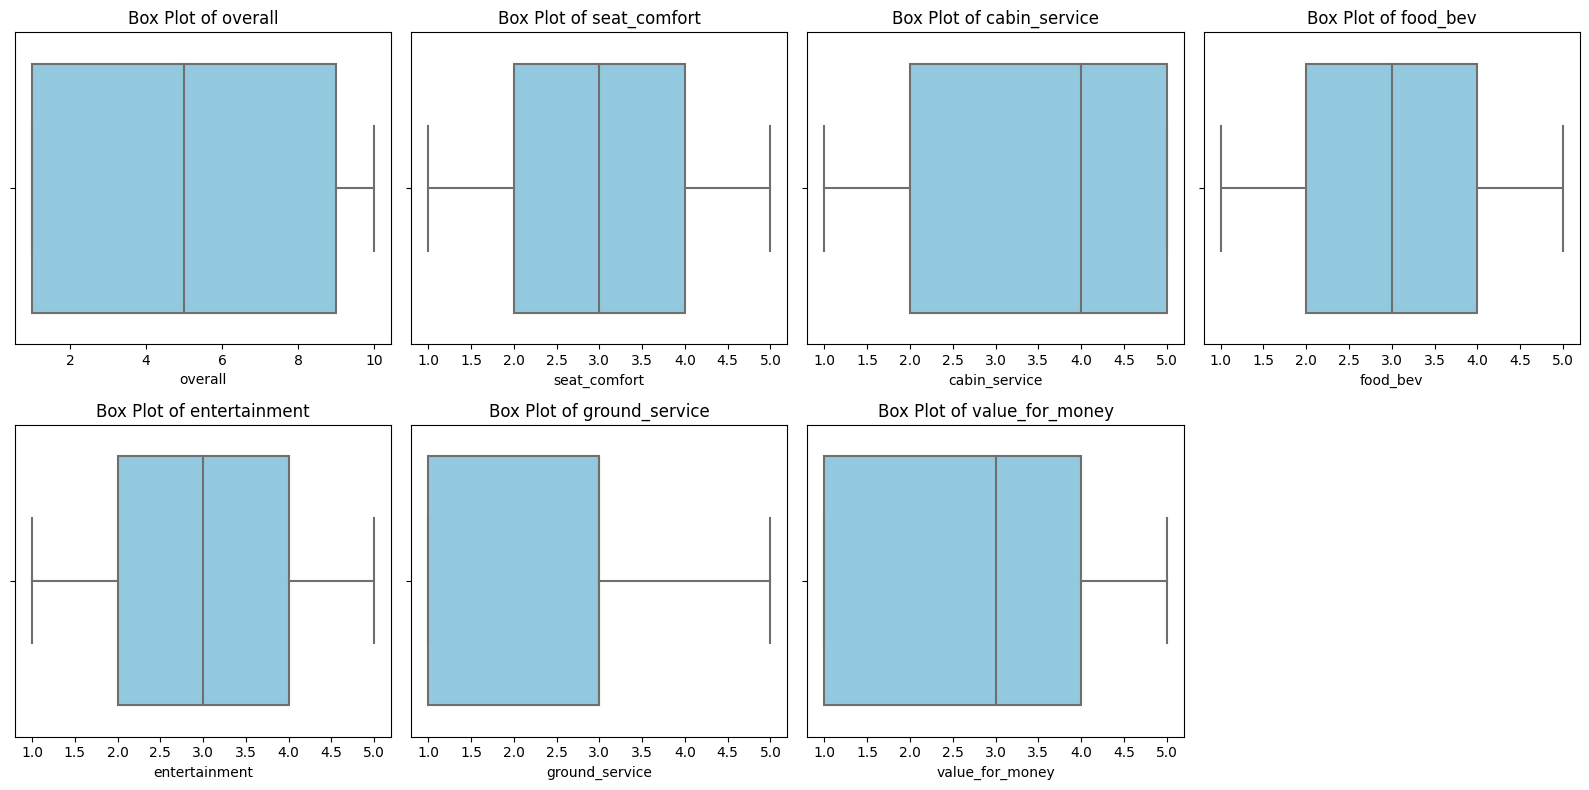

In [41]:
 #visualization  box plot for outliers


# List of numerical columns to check for outliers
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set up subplots for each numerical column
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=airline_data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

I chose box plots for this visualization because they are effective for identifying outliers in numerical data. Box plots provide a clear visual representation of the distribution of data, including the presence of outliers. Outliers are typically shown as individual data points that fall significantly outside the "whiskers" of the box plot. This chart allows for a quick and intuitive assessment of whether any numerical columns in the dataset contain outliers, which is important for data quality and analysis.

##### 2. What is/are the insight(s) found from the chart?

The box plots for the numerical columns reveal that there are no significant outliers present in the data. In each box plot, the data points are well within the "whiskers," indicating that there are no extreme values or outliers that fall far from the median. This suggests that the numerical data in the dataset does not contain any unusual or anomalous observations, and the data is relatively consistent in terms of these numerical features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothesis Statement 1: The proportion of 1-star ratings in the overall rating is higher for economy class compared to other classes..
* Hypothesis Statement 2:The proportion of solo leisure travelers recommending flights is more than the proportion of other travelers (business, family leisure, and couple leisure) recommending flights.
* Hypothesis Statement 3:Customers who traveled in August gave more ratings than other months.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The proportion of 1-star ratings in the overall rating is the same for economy class as it is for other classes
*Alternative Hypothesis (H1): The proportion of 1-star ratings in the overall rating is higher for economy class compared to other classes.


#### 2. Perform an appropriate statistical test.

In [83]:
#perform statistical test



# Create a contingency table
contingency_table = pd.crosstab(airline_data['cabin'], airline_data['overall'] == 1)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#print probablity
print("p_value:",p)

# Check p-value against alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence that the proportion of 1-star ratings in the overall rating is higher for economy class.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no evidence that the proportion of 1-star ratings in the overall rating is higher for economy class.")


p_value: 0.0
Reject the null hypothesis.
There is evidence that the proportion of 1-star ratings in the overall rating is higher for economy class.


##### Which statistical test have you done to obtain P-Value?

I performed a chi-squared test for independence to obtain the p-value. This statistical test is used to determine whether there is an association or independence between two categorical variables.

##### Why did you choose the specific statistical test?

I chose the chi-squared test for independence because it's appropriate for analyzing categorical data when we want to determine if there's a significant association between two categorical variables, in this case, the "overall" rating (categorical) and the "cabin" class (categorical).

The result of the test, with a p-value of 0.0, indicates that there is a highly significant association between the "overall" rating and the "cabin" class. In other words, the proportion of 1-star ratings in the overall rating is significantly different between the economy class and other classes. Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis (H0) and conclude that there is evidence of a statistically significant difference in the proportion of 1-star ratings among different cabin classes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): Null Hypothesis (H0): The proportion of solo leisure travelers recommending flights is less than or equal to the proportion of other travelers (business, family leisure, and couple leisure) recommending flights.
* Alternate Hypothesis (H1): The proportion of solo leisure travelers recommending flights is more than the proportion of other travelers (business, family leisure, and couple leisure) recommending flights.



#### 2. Perform an appropriate statistical test.

In [92]:
#perform  statistical test

# Create contingency table
contingency_table = pd.crosstab(airline_data['traveller_type'], airline_data['recommended'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level (e.g., 0.05)
alpha = 0.05

# Print test results
print(f"P-value: {p}")

# Compare p-value to the significance level
if p < alpha:
    print("Reject the null hypothesis")
    print("The proportion of solo leisure travelers recommending flights higher than other travelers")
else:
    print("Fail to reject the null hypothesis.")
    print("The proportion of solo leisure travelers recommending flights is less than or equal to other travelers")


P-value: 0.0
Reject the null hypothesis
The proportion of solo leisure travelers recommending flights higher than other travelers


##### Which statistical test have you done to obtain P-Value?

I have performed the Chi-Square test of independence in this case. The Chi-Square test is used to determine whether there is an association between two categorical variables. In this specific test, I compared the recommendations (recommended or not recommended) among different traveler types (solo leisure travelers and other travelers)

##### Why did you choose the specific statistical test?

I chose the Chi-Square test of independence because it is appropriate for analyzing the relationship between two categorical variables when we want to determine if there is a significant association between them. In this case, we were interested in understanding if there is a significant difference in the proportions of recommendations (recommended or not recommended) between two categories of travelers (solo leisure travelers and other travelers).

The result obtained from the Chi-Square test is a p-value of 0.0, which is extremely small. When the p-value is very close to or equal to 0.0 which ia less than 0.05 significicant level, it indicates strong evidence against the null hypothesis (H0). Therefore, we reject the null hypothesis,& concluded that the proportion of solo leisure travelers recommending flights higher than other travelers.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): Customer traved in august (8) month gave less than equal ratings than other months
* Alternate Hypothesis (H1): Customer traved in august (8) month gave more ratings than other months.

#### 2. Perform an appropriate statistical test.

In [97]:
# Perform Statistical Test to obtain P-Value


# Create two groups: August (8) travelers and travelers in other months
august_reviews = airline_data[airline_data['flown_month'] == 8]['overall']
other_months_reviews = airline_data[airline_data['flown_month'] != 8]['overall']

# Perform the t-test
t_stat, p_value = ttest_ind(august_reviews, other_months_reviews)

# Set significance level
alpha = 0.05

# Print the results
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Customers who traveled in August gave more ratings than other months.")
else:
    print("Fail to reject the null hypothesis.")
    print("Customers who traveled in August did not give significantly more ratings than other months.")


P-value: 0.0
Reject the null hypothesis
Customers who traveled in August gave more ratings than other months.


##### Which statistical test have you done to obtain P-Value?

The statistical test I have performed to obtain the p-value is the two-sample t-test (independent samples t-test).

##### Why did you choose the specific statistical test?

The specific statistical test chosen for this analysis was the two-sample t-test. This test was selected because it is appropriate for comparing the means of two independent samples, which aligns with our objective of comparing customer review ratings between August and the other months.

The result of the two-sample t-test produced a remarkably low p-value of 0.0 significatly less than 0.05(significant level). This extremely low p-value indicates strong evidence against the null hypothesis, leading us to reject it. Therefore, we conclude that customer ratings in August were significantly higher than those in other months.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***